In [1]:
#TO remove :
import os
directory = os.getcwd()
print(directory)

C:\Users\s1114237\OneDrive - Syngenta\Formations\Training\EPFL extension school\Machine_Learning_EPFL-extension-school\Course#3 Applied Machine Learning 1\Project_C3\Houses-Prices


In [2]:
#os.chdir("Machine_Learning_EPFL-extension-school\Course#3 Applied Machine Learning 1\Project_C3\Warm-Up")
#directory = os.getcwd()
#print(directory)

## Library

In [3]:
# library 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import SGDRegressor

In [4]:
#functions 
# print a complete table : (source: https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe )
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.options.display.max_colwidth = 150# (source : https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
    display(x)
    pd.reset_option('display.max_rows') 
    pd.options.display.max_colwidth = 50 

# House - prices  

### Task : 
- A) [Exploratory data analysis and data cleaning](#TaskA)
- B) [Feature engineering](#TaskB)
- C) [Splitting data](#TaskC)
- D) [Model fitting](#TaskD)
- E) [Regularization](#TaskE)
- F) [Evaluation](#TaskF)
- G) [Prediction](#TaskG)

 

<a id="TaskA"></a>
## Exploratory data analysis and data cleaning

Data: 2930 * 82 attributes cf documentation.txt
Training set : 2430 first ones 
test set : 500 last ones (no prices)

- The order and PID : identifiers
- the data isn't clean : there are incorrect and missing data

### Load data

In [5]:
# Download 
data_df = pd.read_csv("house-prices.csv")
data_df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070           60        RL           NaN      8795   Pave   
1   2586  535305120           20        RL          75.0     10170   Pave   
2   2289  923228250          160        RM          21.0      2001   Pave   
3    142  535152150           20        RL          70.0     10552   Pave   
4   2042  903475060          190        RM          60.0     10120   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
3   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Bnk  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       4    2009       WD           Normal     236000  
1        0       6    2006       WD           Normal     155000  
2        0       1    2007       WD           Normal      75000  
3        0       4    2010       WD           Normal     165500  
4        0       1    2007       WD           Normal     122000  

[5 rows x 82 columns]

### Numbers of rows and columns :

In [6]:
data_df.shape

(2430, 82)

This data set correspond to the training set.

### Data type :

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Type        2430 non-null   object 
 17  House Style   

From this list we will remove unneeded column as :'Order', 'PID'. 

In [8]:
data_df.drop(['Order', 'PID'], axis =1, inplace=True)

### Set of variable :

From the info and the documentation we create different set of column lists :
- List of categorical variables (without identifier columns)
- sub list with nominal variables
- sub list with ordinal variables
- List of quantitative variables
- sub list with only continous variables
- sub list with only discrete variables

In [9]:
data_df.columns.values

array(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2',
       'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish'

In [10]:
cat_col = ['MS SubClass','MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 
           'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
           'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Roof Matl', 
           'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',  'Foundation', 
           'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 
           'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 
           'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 
           'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

In [11]:
cat_nom_col = ['MS SubClass', #(Nominal) : Identifies the type of dwelling involved in the sale.
           'MS Zoning', # (Nominal): Identifies the general zoning classification of the sale.
           'Street', # Street (Nominal): Type of road access to property
           'Alley', # Alley (Nominal): Type of alley access to property
           'Land Contour', # Land Contour (Nominal): Flatness of the property               
           'Lot Config', # Lot Config (Nominal): Lot configuration
           'Neighborhood',# Neighborhood (Nominal): Physical locations within Ames city limits (map available)
           'Condition 1',# Condition 1 (Nominal): Proximity to various conditions
           'Condition 2', # Condition 2 (Nominal): Proximity to various conditions (if more than one is present)
           'Bldg Type',# Bldg Type (Nominal): Type of dwelling
           'House Style', # House Style (Nominal): Style of dwelling 
           'Roof Style',# Roof Style (Nominal): Type of roof
           'Roof Matl', # Roof Matl (Nominal): Roof material
           'Exterior 1st', # Exterior 1 (Nominal): Exterior covering on house
           'Exterior 2nd',# Exterior 2 (Nominal): Exterior covering on house (if more than one material)
           'Mas Vnr Type',# Mas Vnr Type (Nominal): Masonry veneer type
           'Foundation', # Foundation (Nominal): Type of foundation 
           'Heating', # Heating	(Nominal): Type of heating 
           'Central Air', # Central Air (Nominal): Central air conditioning
           'Garage Type', # Garage Type (Nominal): Garage location
           'Misc Feature', # Misc Feature (Nominal): Miscellaneous feature not covered in other categories
           'Sale Type', # Sale Type (Nominal): Type of sale
           'Sale Condition' # Sale Condition (Nominal): Condition of sale
              ]

In [12]:
cat_ord_col = ['Lot Shape', # Lot Shape (Ordinal): General shape of property
               'Utilities', # Utilities (Ordinal): Type of utilities available
               'Land Slope', # Land Slope (Ordinal): Slope of property 
               'Overall Qual',# Overall Qual (Ordinal): Rates the overall material and finish of the house
               'Overall Cond', # Overall Cond (Ordinal): Rates the overall condition of the house
               'Exter Qual',# Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
               'Exter Cond', # Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior
               'Bsmt Qual', # Bsmt Qual (Ordinal): Evaluates the height of the basement
               'Bsmt Cond', # Bsmt Cond (Ordinal): Evaluates the general condition of the basement
               'Bsmt Exposure', # Bsmt Exposure (Ordinal): Refers to walkout or garden level walls
               'BsmtFin Type 1', # BsmtFin Type 1 (Ordinal): Rating of basement finished area
               'BsmtFin Type 2', # BsmtFinType 2 (Ordinal): Rating of basement finished area (if multiple types) 
               'Heating QC', # HeatingQC (Ordinal): Heating quality and condition
               'Electrical', # Electrical (Ordinal): Electrical system
               'Kitchen Qual', # KitchenQual (Ordinal): Kitchen quality
               'Functional', # Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)
               'Fireplace Qu', # FireplaceQu (Ordinal): Fireplace quality
               'Garage Finish', # Garage Finish (Ordinal): Interior finish of the garage
               'Garage Qual', # Garage Qual (Ordinal): Garage quality
               'Garage Cond', # Garage Cond (Ordinal): Garage condition
               'Paved Drive', # Paved Drive (Ordinal): Paved driveway
               'Pool QC', # Pool QC (Ordinal): Pool quality
               'Fence', # Fence (Ordinal): Fence quality
              ]

In [13]:
num_col = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
           'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 
           '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 
           'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 
           'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 
           'Open Porch SF','Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',    
           'Misc Val','Mo Sold', 'Yr Sold','SalePrice']

In [14]:
cont_col =['Lot Frontage', #Lot Frontage (Continuous): Linear feet of street connected to property
           'Lot Area', #Lot Area (Continuous): Lot size in square feet
           'Mas Vnr Area', # Mas Vnr Area (Continuous): Masonry veneer area in square feet
           'BsmtFin SF 1', # BsmtFin SF 1 (Continuous): Type 1 finished square feet
           'BsmtFin SF 2', # BsmtFin SF 2 (Continuous): Type 2 finished square feet
           'Bsmt Unf SF', # Bsmt Unf SF (Continuous): Unfinished square feet of basement area
           'Total Bsmt SF', # Total Bsmt SF (Continuous): Total square feet of basement area
           '1st Flr SF', # 1st Flr SF (Continuous): First Floor square feet 
           '2nd Flr SF', # 2nd Flr SF (Continuous)	: Second floor square feet
           'Low Qual Fin SF', # Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)
           'Gr Liv Area', # Gr Liv Area (Continuous): Above grade (ground) living area square feet
           'Garage Area', # Garage Area (Continuous): Size of garage in square feet         
           'Wood Deck SF', # Wood Deck SF (Continuous): Wood deck area in square feet
           'Open Porch SF', # Open Porch SF (Continuous): Open porch area in square feet
           'Enclosed Porch', # Enclosed Porch (Continuous): Enclosed porch area in square feet
           '3Ssn Porch', # 3-Ssn Porch (Continuous): Three season porch area in square feet
           'Screen Porch', # Screen Porch (Continuous): Screen porch area in square feet
           'Pool Area', # Pool Area (Continuous): Pool area in square feet  
           'Misc Val' # Misc Val (Continuous): $Value of miscellaneous feature
          ]

In [15]:
disc_col =['Year Built', # Year Built (Discrete): Original construction date
           'Year Remod/Add', # Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)
           'Bsmt Full Bath', # Bsmt Full Bath (Discrete): Basement full bathrooms
           'Bsmt Half Bath', # Bsmt Half Bath (Discrete): Basement half bathrooms
           'Full Bath', # Full Bath (Discrete): Full bathrooms above grade
           'Half Bath', # Half Bath (Discrete): Half baths above grade
           'Bedroom AbvGr', # Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)
           'Kitchen AbvGr', # Kitchen (Discrete): Kitchens above grade
           'TotRms AbvGrd', # TotRmsAbvGrd (Discrete): Total rooms above grade (does not include bathrooms)
           'Fireplaces',  # Fireplaces (Discrete): Number of fireplaces          
           'Garage Yr Blt', # Garage Yr Blt (Discrete): Year garage was built         
           'Garage Cars', # Garage Cars (Discrete): Size of garage in car capacity
           'Mo Sold', # Mo Sold (Discrete): Month Sold (MM)
           'Yr Sold' # Yr Sold (Discrete): Year Sold (YYYY)
          ]

### graphical representation :
We want to plot the data. 
It will allow us to apprehend range of the different input, if some variable are shrink or if some have visible outliers. Firstly we will just plot the numerical variables. Then we will plot them against the 'sale price' to see if we detect correlation or transformation to apply. 


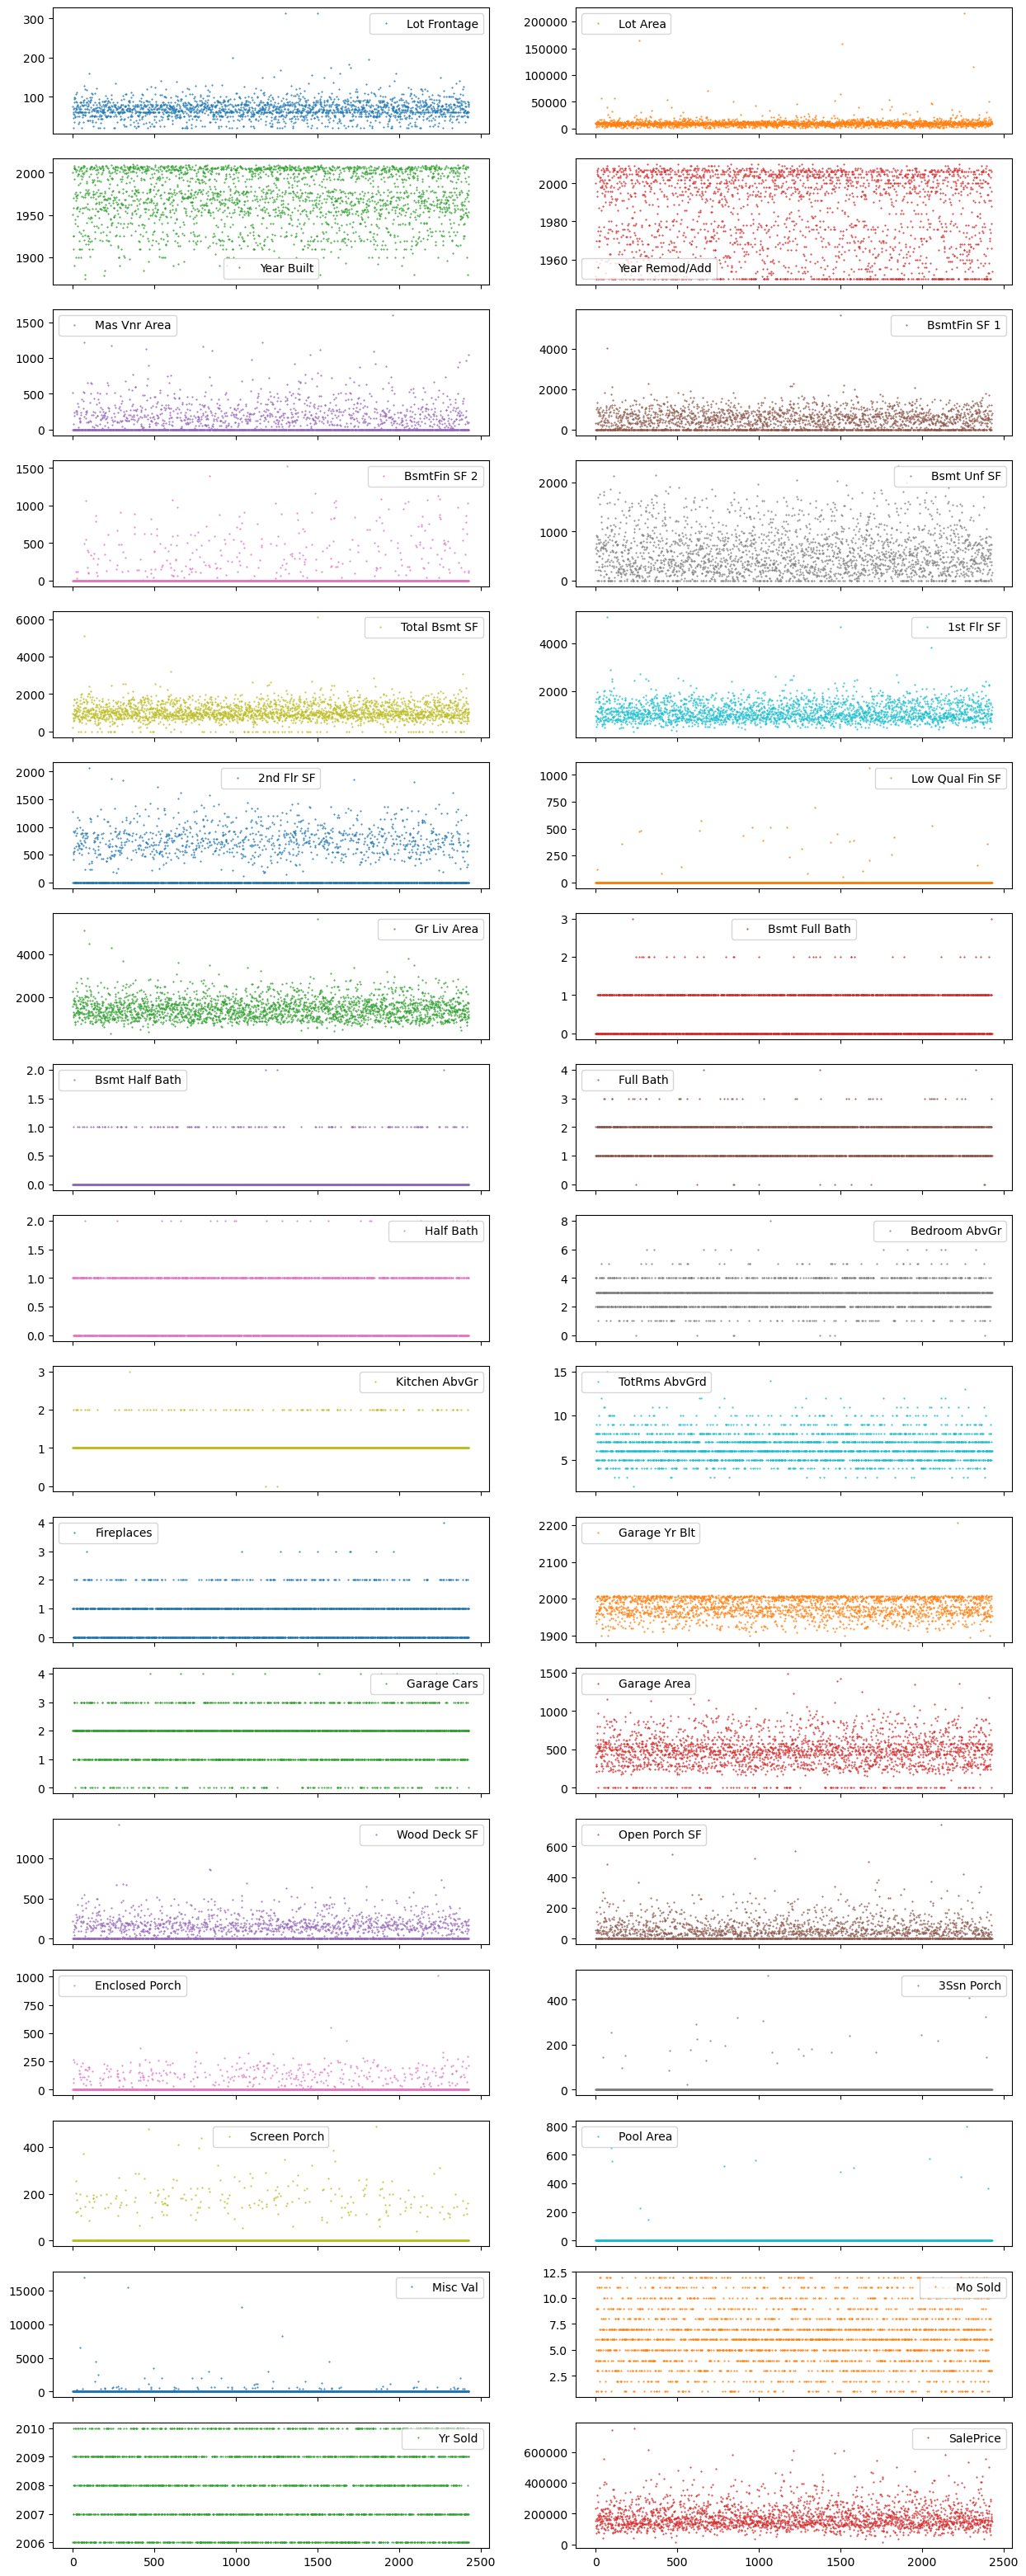

In [16]:
data_df[num_col].plot(lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 40), markersize=1);

- Garage Yr Blt : show a visible outlier. A year 2200 is not possible. It's probably a typo.
- We didn't detect variables with a lot of missing data. But We will have to go deeper into this later.
- We detect that some variable can have a high amount of null values. We will check it more in detail by ploting the distribution (histogram) of the numerical varables.

Before checking the distribution of the numerical variables we check quicly the error in the variable 'Garage Yr Blt' 

In [17]:
print(data_df[['Year Built','Year Remod/Add','Garage Yr Blt']][data_df['Garage Yr Blt']>2024])

      Year Built  Year Remod/Add  Garage Yr Blt
2219        2006            2007         2207.0


The error on the "Garage  year" built look like a typo and the garage can only be built between 2006 and  2007. By changing the value 2207 by 2007 we should stay close to the reality.

In [18]:
data_df.loc[data_df['Garage Yr Blt']>2024, 'Garage Yr Blt'] = 2007

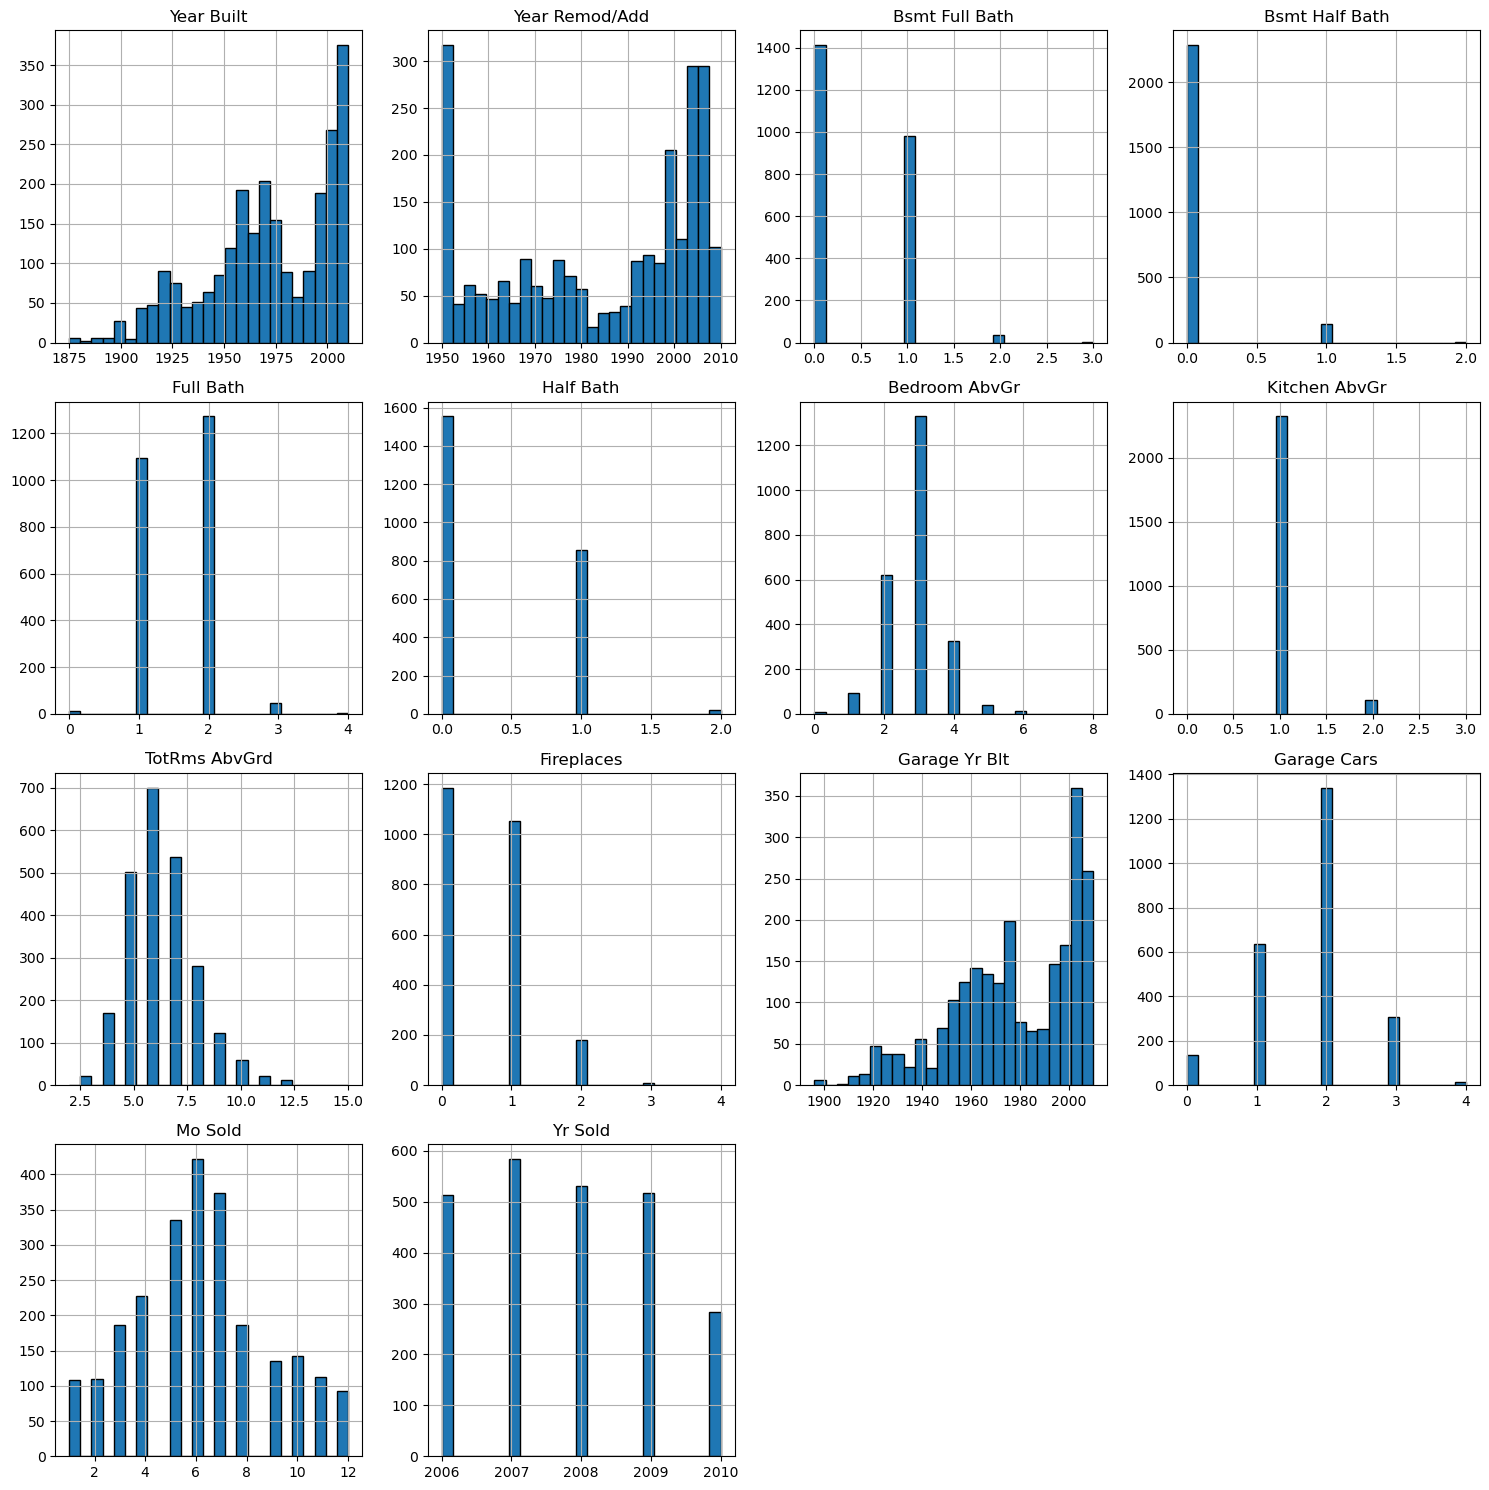

In [19]:
# Plots the histogram for each discret feature in a separate subplot
data_df[disc_col].hist(bins=25, figsize=(15, 15), layout=(-1, 4), edgecolor="black")
plt.tight_layout()

The distrubution of discrete column show different shape:
 - Some look Gaussian as 'TotRms Abv Grd' or 'Mo Sold', 
 - Some are more monotone, almost only increase as 'Year built' or only decrease as 'Bsmt Full Bath' or 'Fireplaces'
 - One look bimodal as 'Year Remod/Add'. May be the default value is 1950, when the information is unknow or older.
 - Last thing that we saw is the similarity in term of distribution between the variable 'Year Built' and 'Garage Yr Blt'. (It's make thing logical.)
 
We plot the distribution of continuous variable and nextt to the distribution of the same variable log-transformed : 

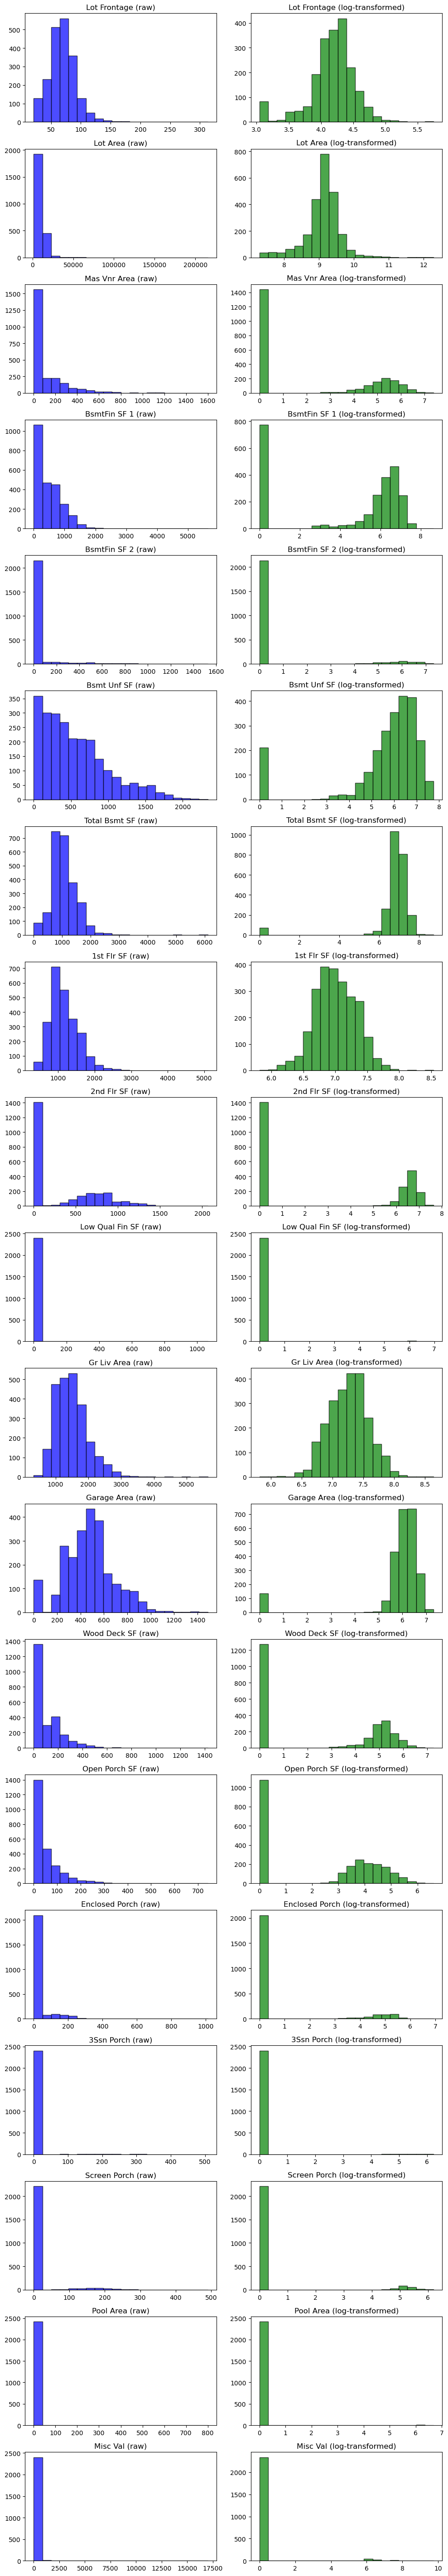

In [20]:
# Calcul des logarithmes, en ajoutant une petite constante pour éviter le log(0)
epsilon = 1e-6

df_log = np.log(data_df[cont_col].replace(0, 1))
#df_log = df_log.replace(np.nan, 0)
#df_log = np.log(data_df[cont_col] + epsilon)

# Nombre de variables (colonnes) à tracer
num_vars = len(cont_col)

# Création des subplots
fig, axes = plt.subplots(nrows=num_vars, ncols=2, figsize=(10, 3 * num_vars))

for i, col in enumerate(cont_col):
    # Histogramme de la variable brute
    axes[i, 0].hist(data_df[cont_col][col], bins=20, color='blue', alpha=0.7, edgecolor="black")
    axes[i, 0].set_title(f'{col} (raw)')
    
    # Histogramme de la variable transformée par le log
    axes[i, 1].hist(df_log[col], bins=20, color='green', alpha=0.7, edgecolor="black")
    axes[i, 1].set_title(f'{col} (log-transformed)')

# Ajustement de l'espacement entre les plots
plt.tight_layout()
plt.show()

Then we compare ne numerical variables to the saleprice :

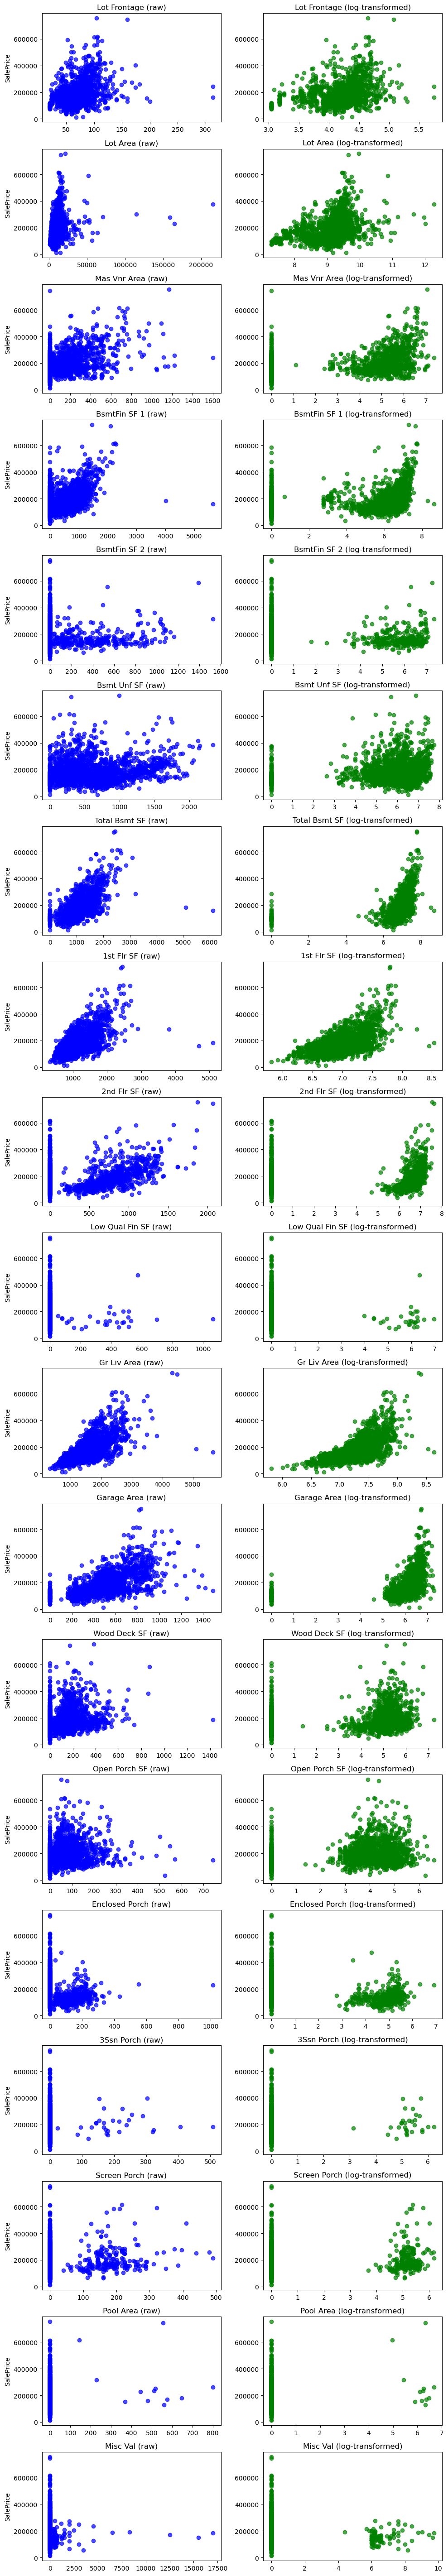

In [21]:
# Calcul des logarithmes, en ajoutant une petite constante pour éviter le log(0)
#epsilon = 1e-6
df_log = np.log(data_df[cont_col].replace(0,1))
#df_log = df_log.replace(np.nan, 0)
#df_log = np.log(data_df[cont_col] + epsilon)

# Nombre de variables (colonnes) à tracer
num_vars = len(cont_col)

# Création des subplots
fig, axes = plt.subplots(nrows=num_vars, ncols=2, figsize=(10, 3 * num_vars))

for i, col in enumerate(cont_col):
    # Histogramme de la variable brute
    axes[i, 0].scatter(y = data_df['SalePrice'], x = data_df[cont_col][col], color='blue', alpha=0.7)
    axes[i, 0].set_title(f'{col} (raw)')
    axes[i, 0].set_ylabel("SalePrice")
    
    
    # Histogramme de la variable transformée par le log
    axes[i, 1].scatter(y = data_df['SalePrice'],x =  df_log[col], color='green', alpha=0.7)
    axes[i, 1].set_title(f'{col} (log-transformed)')

# Ajustement de l'espacement entre les plots
plt.tight_layout()
plt.show()

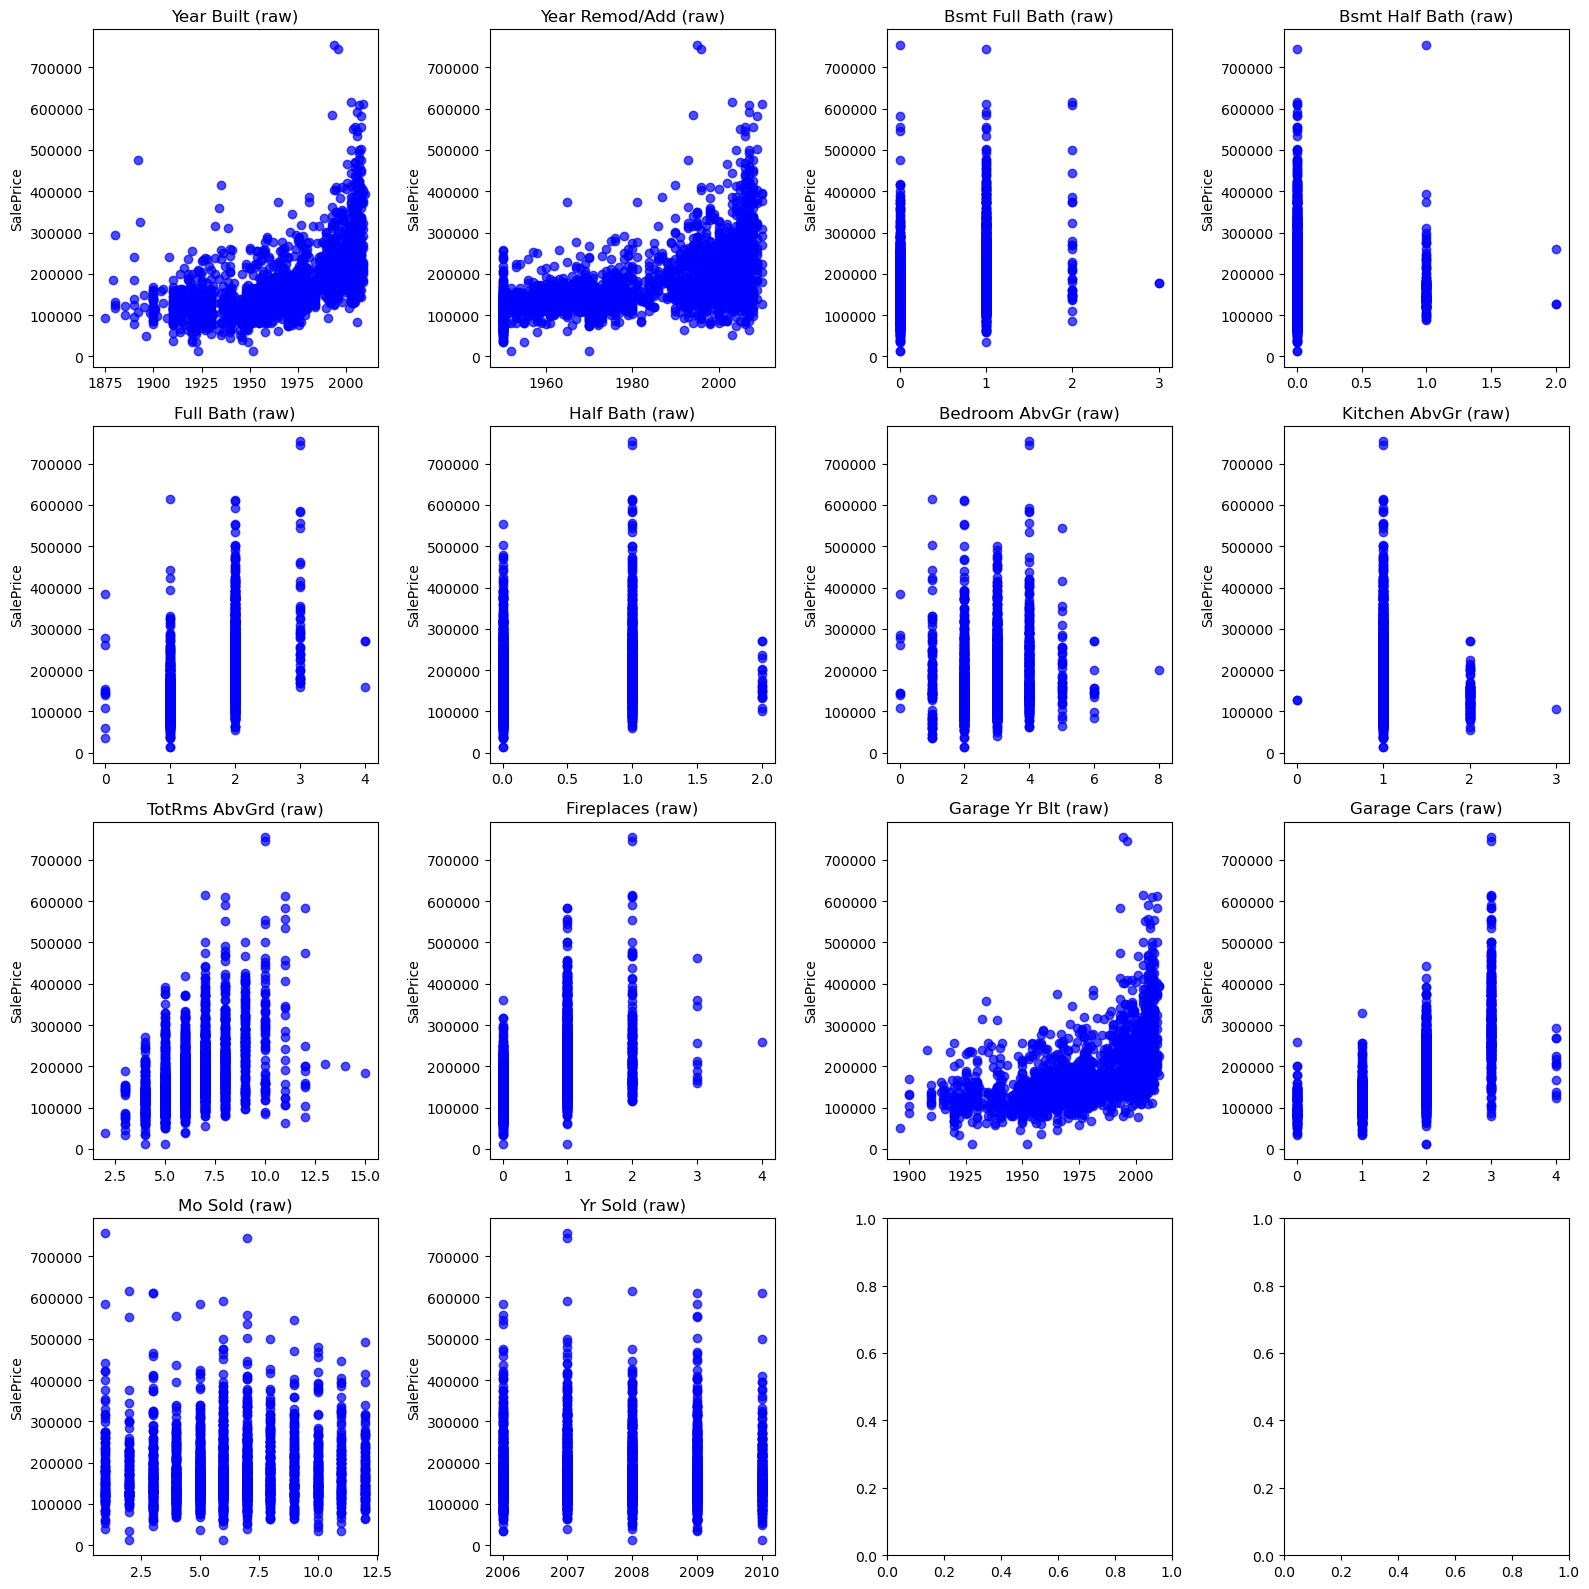

In [22]:
# Nombre de variables (colonnes) à tracer
num_vars = len(disc_col)

nb_cols = 4 # int(np.sqrt(num_vars))
nb_rows = 4 #int(np.sqrt(num_vars)) +1

# Création des subplots
fig, axes = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(4 * nb_cols, 4 * nb_rows))

x = 0
y = 0

for i, col in enumerate(disc_col):
    # Histogramme de la variable brute
    axes[x, y].scatter(y = data_df['SalePrice'], x = data_df[col], color='blue', alpha=0.7)
    axes[x, y].set_title(f'{col} (raw)')
    axes[x, y].set_ylabel("SalePrice")
    
    if (y+1)/nb_cols == 1:
        y = -1
        x = x + 1
    y = y + 1
    
        
fig.tight_layout()

plt.show()

Equally we want to compare categorical variables with sale price : boxplot 

In [23]:
#I transform the numerical type of cat col
data_df['MS SubClass'] = data_df['MS SubClass'].apply(str)
data_df['Overall Qual'] = data_df['Overall Qual'].apply(str)
data_df['Overall Cond'] = data_df['Overall Cond'].apply(str)

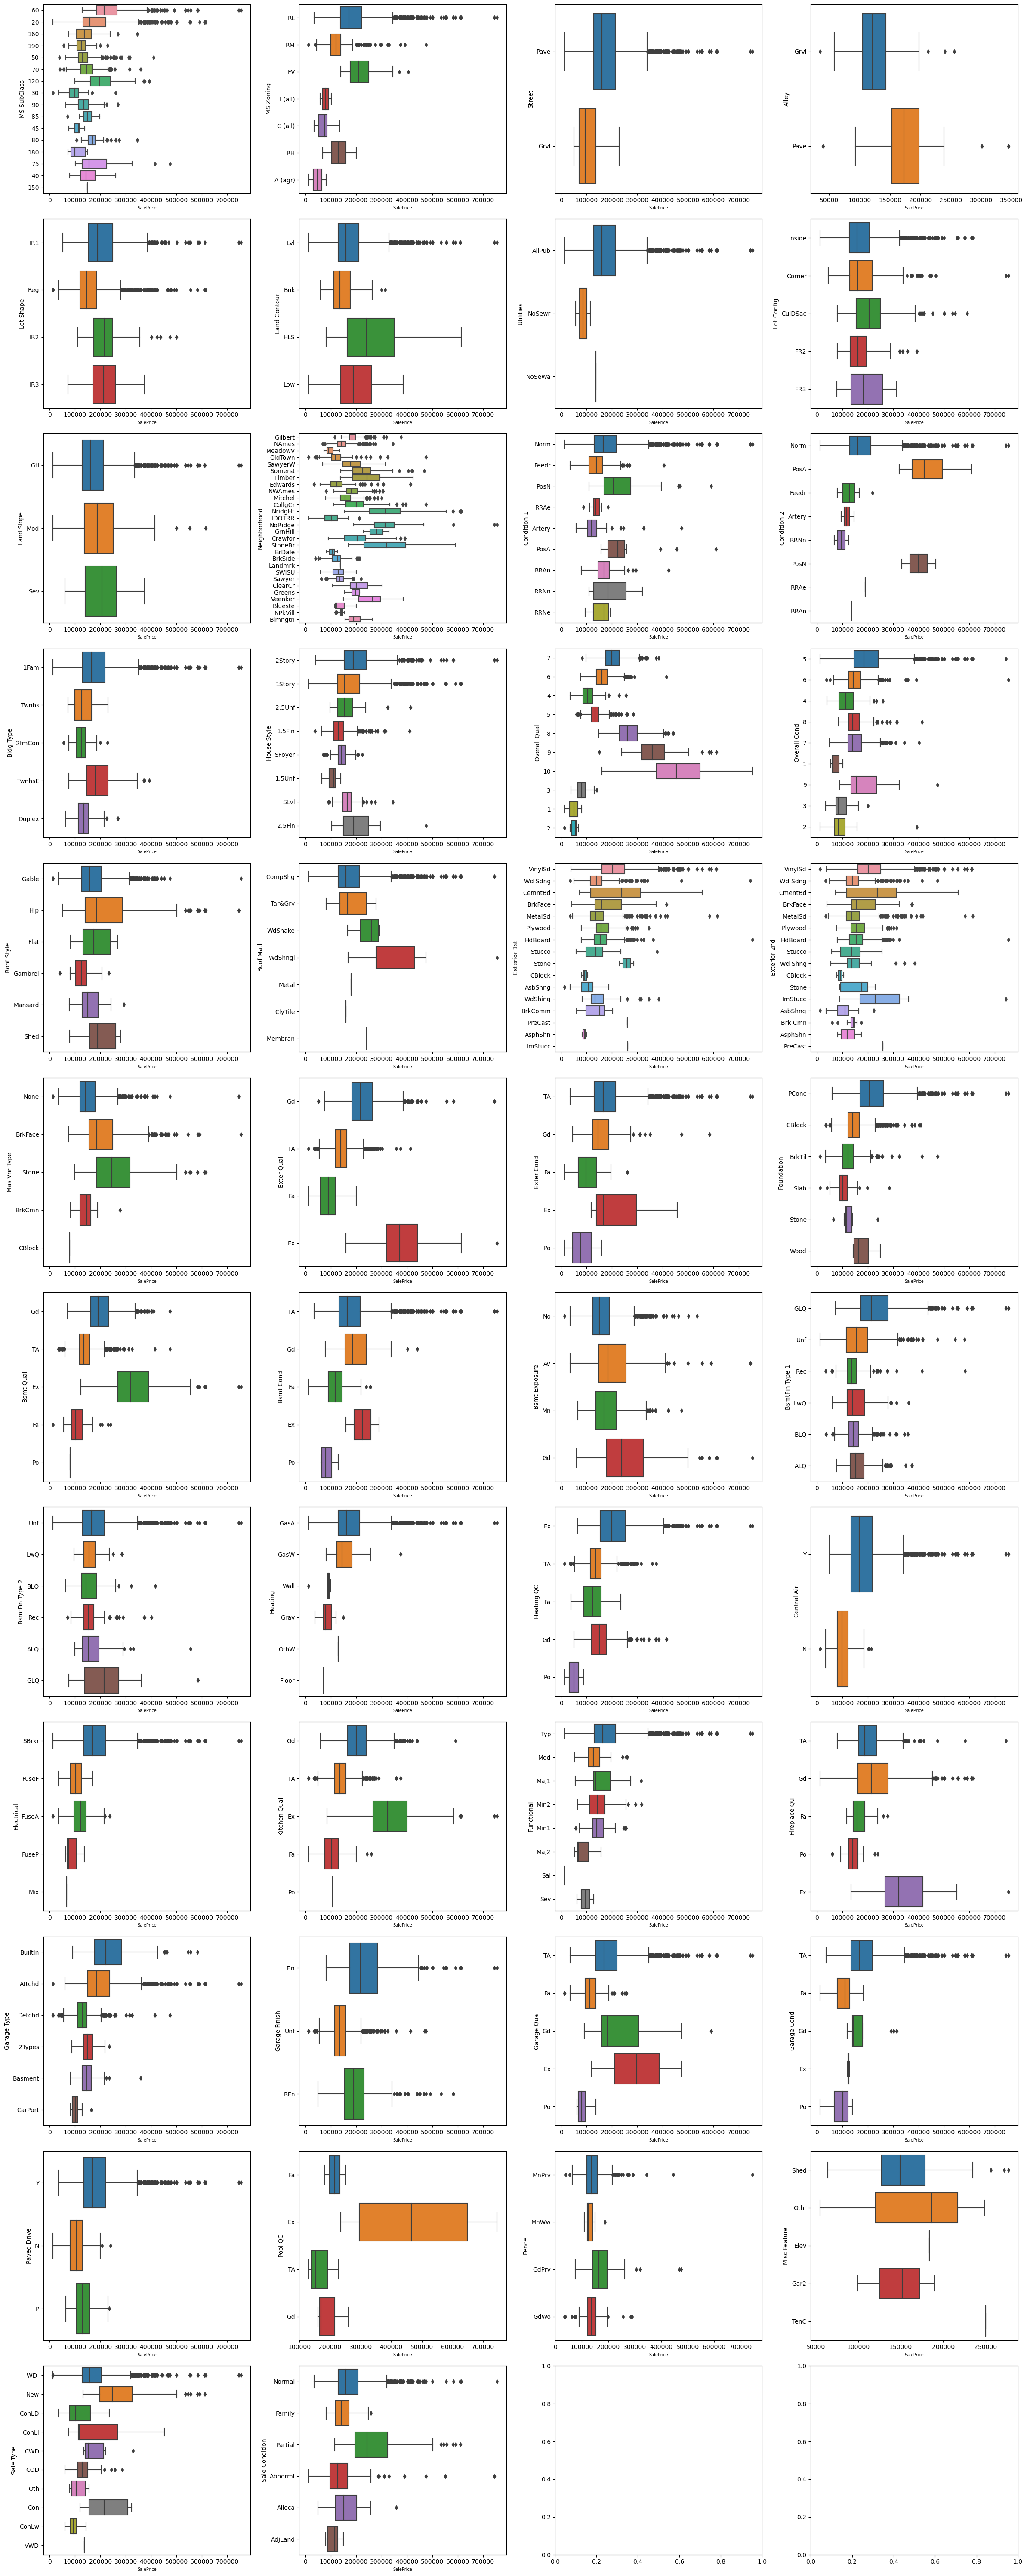

In [24]:

nb_cols = 4 # int(np.sqrt(len(cat_col)))
nb_rows = 12 # int(np.sqrt(len(cat_col))) +1

fig, axes = plt.subplots(nrows = nb_rows, 
                         ncols = nb_cols, 
                         figsize = (6*nb_cols,5*nb_rows)) # sets the width and height of the figure (in inches)
x = 0
y = 0
for i in range(len(cat_col)):
   
    sns.boxplot(data=data_df, y=cat_col[i], x='SalePrice', ax=axes[x,y])# hue=col_cat[i],
    axes[x,y].set_xlabel('SalePrice', fontsize=7)
    
    if (y+1)/nb_cols == 1:
        y = -1
        x = x + 1
    y = y + 1
    
        
fig.tight_layout()

plt.show()

**Bilan** : 

Numerical variables :
- Generally normal distribution
- 2-3 variables seems better correlated to sales price after a log transformation : Lot frontage, lot area, 1st Flr SF
- Some outlier seems visible
- Some variables have a really low number of observation (value  > 0), this variable describe a feature not seen in most of the  houses as Pool or Porch or Misc Val.  

Categorical variables have a huge impact on sale.
- The first category variable 'MS Subclass' has many class, it's too miscellanious the class name is numerical but it's not ordinal. 
- Overall Qual and Overall Cond could be considered as disrete variable  as (numerical value) directly
- Other ordinal variable could be convert into disrete variables (as Exter  Qual, Exter Cond, Kitchen Qual, Bsmt Qual,...)

Then cleaning : 
We will apply the process performed during the Project 2
1. Check if there are duplicate entry and removed them
2. Check for missing values and replace them
3. Removing outliers
4. Transform ordinal categorical variable into discrete ones


Then correlation heatmap (here or after hot encoded)

### Duplicated entry 

In [25]:
data_df.loc[data_df.duplicated(), :].shape

(0, 80)

No duplicate entry. Good.

### Missing values :

In [26]:
df_summarize_missing_values = pd.DataFrame(
    {
        "missing_values_#": data_df[cat_col].isna().sum(),
        "missing_values_percent": round((data_df[cat_col].isna().sum()/data_df.shape[0])*100,3),
    }
    
)
print_full(df_summarize_missing_values.sort_values(by = ["missing_values_percent"], ascending=False)) 

missing_values_#  missing_values_percent
Pool QC                     2418                  99.506
Misc Feature                2340                  96.296
Alley                       2267                  93.292
Fence                       1941                  79.877
Fireplace Qu                1186                  48.807
Garage Cond                  138                   5.679
Garage Qual                  138                   5.679
Garage Finish                138                   5.679
Garage Type                  136                   5.597
Bsmt Exposure                 74                   3.045
BsmtFin Type 2                72                   2.963
BsmtFin Type 1                71                   2.922
Bsmt Cond                     71                   2.922
Bsmt Qual                     71                   2.922
Mas Vnr Type                  20                   0.823
Electrical                     1                   0.041
Functional                     0                   0.000
Kitchen Qual                   0                   0.000
Central Air                    0                   0.000
Heating QC                     0                   0.000
Heating                        0                   0.000
Paved Drive                    0                   0.000
Sale Type                      0                   0.000
MS SubClass                    0                   0.000
Foundation                     0                   0.000
MS Zoning                      0                   0.000
Condition 2                    0                   0.000
Street                         0                   0.000
Lot Shape                      0                   0.000
Land Contour                   0                   0.000
Utilities                      0                   0.000
Lot Config                     0                   0.000
Land Slope                     0                   0.000
Neighborhood                   0                   0.000
Condition 1                    0                   0.000
Bldg Type                      0                   0.000
Exter Cond                     0                   0.000
House Style                    0                   0.000
Overall Qual                   0                   0.000
Overall Cond                   0                   0.000
Roof Style                     0                   0.000
Roof Matl                      0                   0.000
Exterior 1st                   0                   0.000
Exterior 2nd                   0                   0.000
Exter Qual                     0                   0.000
Sale Condition                 0                   0.000

For categorical variable NA can be a category. It's the case for :
- Pool QC
- Misc Feature
- Alley
- Fence
- Fireplace Qu
- Garage Cond, Garage Qual, Garage Finish, Garage Type
- Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Cond, Bsmt Qual


In most of this case it's design that the house associated didn't have this feature (Pool, Garage, fireplace, fence,...).

For Pool  QC, Misc Feature and Alley almost all the houses have not this features. They are rare but valuable in particular for Pool QC, we saw an impact on the boxplot same thing for Alley. It's less the case for Misc Feature so we decide to drop this variable.

For Garage we see that 138 houses are declared without a Garage but only 136 houses have no garage based on the variable Garage Type. I think to remove the 2 inconsistent entries.

Idem for basement 71 to 74 houses have no basement. Removed the 3 houses with/without basement to stay consistent and keep in our training set most representative house seems better.

The 2 categorical variables Mas Vnr type and Electrical should not be unknown as it concern only 21 entries at max we should to remove them.

In [27]:
data_df.drop(['Misc Feature'], axis =1, inplace=True)
cat_col.remove('Misc Feature')

In [28]:
# We remove inconsitencies
# On crée des masques booléens pour chaque colonne indiquant si la valeur est NaN ou non
cond_isna = data_df['Garage Cond'].isna()
qual_isna = data_df['Garage Qual'].isna()
finish_isna = data_df['Garage Finish'].isna()
type_isna = data_df['Garage Type'].isna()

# On crée un masque pour les lignes où exactement une colonne est non-NaN et les autres sont NaN
one_value_mask = (
    (cond_isna & qual_isna & finish_isna & ~type_isna) |
    (cond_isna & qual_isna & ~finish_isna & type_isna) |
    (cond_isna & ~qual_isna & finish_isna & type_isna) |
    (~cond_isna & qual_isna & finish_isna & type_isna)
)

# On inverse le masque pour obtenir les lignes où ce n'est pas le cas
not_one_value_mask = ~one_value_mask

# On filtre le DataFrame pour ne garder que les lignes désirées
df_filtered =  data_df[~not_one_value_mask]

# Vérification des résultats
print(df_filtered[['Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type']])

     Garage Cond Garage Qual Garage Finish Garage Type
1114         NaN         NaN           NaN      Detchd
1565         NaN         NaN           NaN      Detchd


In [29]:
 data_df =  data_df[not_one_value_mask]

In [30]:
# On crée des masques booléens pour chaque colonne indiquant si la valeur est NaN ou non
exposure_isna = data_df['Bsmt Exposure'].isna()
fin_type2_isna = data_df['BsmtFin Type 2'].isna()
fin_type1_isna = data_df['BsmtFin Type 1'].isna()
cond_isna = data_df['Bsmt Cond'].isna()
qual_isna = data_df['Bsmt Qual'].isna()

# On crée un masque pour les lignes où au moins une colonne est non-NaN et les autres sont NaN
only_one_value_mask = (
    (exposure_isna & fin_type2_isna & ~fin_type1_isna & ~cond_isna & ~qual_isna) |
    (exposure_isna & ~fin_type2_isna & ~fin_type1_isna & ~cond_isna & ~qual_isna) |
    (~exposure_isna & fin_type2_isna & ~fin_type1_isna & ~cond_isna & ~qual_isna)
)

# On inverse le masque pour obtenir les lignes où ce n'est pas le cas
not_only_one_value_mask = ~only_one_value_mask

# On filtre le DataFrame pour ne garder que les lignes désirées
df_filtered = data_df[~not_only_one_value_mask]

# Vérification des résultats
print(df_filtered[['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual']])

     Bsmt Exposure BsmtFin Type 2 BsmtFin Type 1 Bsmt Cond Bsmt Qual
602             No            NaN            GLQ        TA        Gd
875            NaN            Unf            Unf        TA        Gd
1681           NaN            Unf            Unf        TA        Gd
1726           NaN            Unf            Unf        TA        Gd


In [31]:
 data_df =  data_df[not_only_one_value_mask]

We remove this rows because the informations on basement aand garage are contradictory.

In [32]:
# We remove empty entries that shouldn't be null
data_df.loc[data_df['Mas Vnr Type'].isna(),['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley','Mas Vnr Type', 'Mas Vnr Area','Yr Sold', 'Sale Type','Sale Condition', 'SalePrice']]



MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Mas Vnr Type  \
66           120        FV          35.0      4274   Pave  Pave          NaN   
83            60        RL          70.0      8749   Pave   NaN          NaN   
101           20        RL           NaN     32668   Pave   NaN          NaN   
159           20        FV          95.0     11639   Pave   NaN          NaN   
201           20        FV          90.0      7993   Pave   NaN          NaN   
270           20        RL          85.0      9965   Pave   NaN          NaN   
352          120        FV          30.0      5330   Pave  Pave          NaN   
447           60        RL          75.0      9473   Pave   NaN          NaN   
456           60        RL           NaN      7750   Pave   NaN          NaN   
457           80        RL           NaN     11950   Pave   NaN          NaN   
465           20        RL          67.0     10083   Pave   NaN          NaN   
624           60        FV          65.0      8125   Pave   NaN          NaN   
851           60        RL           NaN      7851   Pave   NaN          NaN   
891           20        RL          87.0     10037   Pave   NaN          NaN   
1098          60        RL           NaN     12891   Pave   NaN          NaN   
1480          60        FV           NaN      7500   Pave   NaN          NaN   
1592          60        RL          59.0     15810   Pave   NaN          NaN   
1832          60        FV         112.0     12217   Pave   NaN          NaN   
2137          20        RL          75.0      8050   Pave   NaN          NaN   
2219          20        RL          68.0      8298   Pave   NaN          NaN   

      Mas Vnr Area  Yr Sold Sale Type Sale Condition  SalePrice  
66             NaN     2007       New        Partial     199900  
83             NaN     2009       WD          Normal     198500  
101            NaN     2007       WD          Alloca     200624  
159            NaN     2008       New        Partial     182000  
201            NaN     2009       New        Partial     225000  
270            NaN     2007       New        Partial     235876  
352            NaN     2007       New        Partial     207500  
447            NaN     2008       WD          Normal     237000  
456            NaN     2008       WD          Normal     176000  
457            NaN     2007       WD          Normal     165500  
465            NaN     2009       WD          Normal     184900  
624            NaN     2008       WD          Normal     205950  
851            NaN     2010       WD          Normal     216500  
891            NaN     2008       WD          Normal     247000  
1098           NaN     2009       WD          Normal     257500  
1480           NaN     2008       WD          Normal     205000  
1592           NaN     2007       New        Partial     181755  
1832           NaN     2007       New        Partial     310013  
2137           NaN     2006       WD          Normal     117250  
2219           NaN     2007       New        Partial     267300

As I can't detect a pattern and as I see that MasVnr Area is empty too when this variable should not. I decide to remove this entries.

In [33]:
data_df.dropna(subset=['Mas Vnr Type'], inplace=True)
data_df.dropna(subset=['Electrical'], inplace=True)

We give a categorie : 'NA' for categorical with no value.

In [34]:
#We attribute a value for the others first cat
data_df[cat_col] = data_df[cat_col].fillna('NA')

**For numerical variable :**

In [35]:
df_summarize_missing_values = pd.DataFrame(
    {
        "missing_values_#": data_df[num_col].isna().sum(),
        "missing_values_percent": round((data_df[num_col].isna().sum()/data_df.shape[0])*100,3),
    }
    
)
print_full(df_summarize_missing_values.sort_values(by = ["missing_values_percent"], ascending=False)) 

missing_values_#  missing_values_percent
Lot Frontage                  414                  17.228
Garage Yr Blt                 135                   5.618
Bsmt Full Bath                  2                   0.083
Bsmt Half Bath                  2                   0.083
BsmtFin SF 1                    1                   0.042
BsmtFin SF 2                    1                   0.042
Bsmt Unf SF                     1                   0.042
Total Bsmt SF                   1                   0.042
Yr Sold                         0                   0.000
Garage Cars                     0                   0.000
Garage Area                     0                   0.000
Wood Deck SF                    0                   0.000
Open Porch SF                   0                   0.000
3Ssn Porch                      0                   0.000
Enclosed Porch                  0                   0.000
Mo Sold                         0                   0.000
Fireplaces                      0                   0.000
Pool Area                       0                   0.000
Misc Val                        0                   0.000
Screen Porch                    0                   0.000
Bedroom AbvGr                   0                   0.000
TotRms AbvGrd                   0                   0.000
Kitchen AbvGr                   0                   0.000
Lot Area                        0                   0.000
Half Bath                       0                   0.000
Full Bath                       0                   0.000
Gr Liv Area                     0                   0.000
Low Qual Fin SF                 0                   0.000
2nd Flr SF                      0                   0.000
1st Flr SF                      0                   0.000
Mas Vnr Area                    0                   0.000
Year Remod/Add                  0                   0.000
Year Built                      0                   0.000
SalePrice                       0                   0.000

We have different case :
- Lot Frontage

This variable has a lot of missing values (17%). Does this mean that the length of street connected to the property is null and not measurable or it's just a missing value. When we check the distribution of this variable and the correlation to SalePrice we see that they are somehow correlated. So we can impute data  by replacing the missing value by the mean or the median.   

- Garage Yr Blt 

For this variable I want to check if it's link to the absence of garage or not and complete this colonne by the Year Built. I guess it's the most common case and we can easily check it. 

For this variables :
- Bsmt Full Bath, Bsmt Half Bath, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF

I propose to remove them. It's at most 8 entries. 

In [36]:
#For variables with few missing entries
data_df.dropna(subset=['Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF'], inplace = True)

For Garage :

In [37]:
#For Garage Yr Blt :
data_df.loc[data_df['Garage Yr Blt'].isna(),['Garage Yr Blt', 'Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type', 'Garage Cars']].drop_duplicates()

Garage Yr Blt Garage Cond Garage Qual Garage Finish Garage Type  \
16            NaN          NA          NA            NA          NA   

    Garage Cars  
16          0.0

It's confirmed the missing values in Garage Yr Blt it's for houses with no Garage. I propose to replace them with the Year Built. 

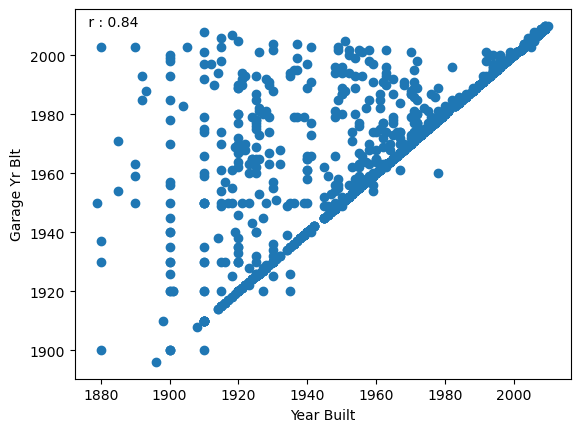

In [38]:
#For Garage Yr Blt :
plt.scatter(data_df['Year Built'], data_df['Garage Yr Blt'])
plt.xlabel('Year Built')
plt.ylabel('Garage Yr Blt')
r = np.corrcoef(data_df.loc[data_df['Garage Yr Blt'].notna(),'Year Built'], data_df.loc[data_df['Garage Yr Blt'].notna(),'Garage Yr Blt'])
plt.text(data_df['Year Built'].min(),data_df['Garage Yr Blt'].max(),f' r : {round(r[0,1],2)} ')


plt.show()

Normally the house is built before the garage or at the same moment. This 2 variables are correlated.

In [39]:
data_df.loc[data_df['Garage Yr Blt'].isna(),'Garage Yr Blt']  = data_df.loc[data_df['Garage Yr Blt'].isna(),'Year Built'] 

For Lot Frontage :
We will start by checking correlation between Lot Frontage and Sale Price then we will test the correlation after replacing missing value by the mean or the median and pick the one who stay the closest to the initial correlation.

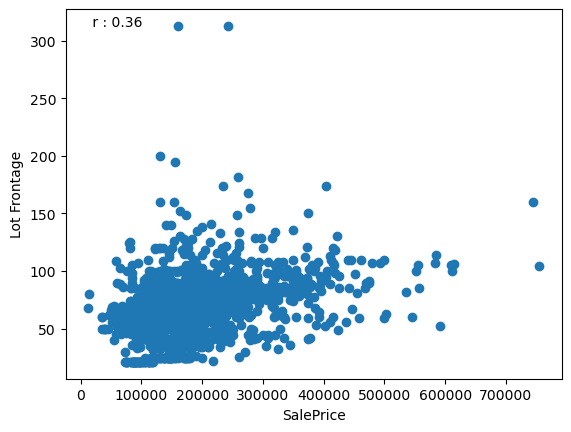

In [40]:
#For Lot Frontage
#df_test1['Lot Frontage'].hist()
plt.scatter(data_df['SalePrice'], data_df['Lot Frontage'])
plt.xlabel('SalePrice')
plt.ylabel('Lot Frontage')

r = np.corrcoef(data_df.dropna()['SalePrice'], data_df.dropna()['Lot Frontage'])
plt.text(data_df['SalePrice'].min(),data_df['Lot Frontage'].max(),f' r : {round(r[0,1],2)} ')

plt.show()

In [41]:
data_df['Lot Frontage'].mean()

69.13789632611977

In [42]:
df_test1 = data_df.copy()
df_test1['Lot Frontage'] = data_df['Lot Frontage'].fillna(data_df['Lot Frontage'].mean())
r = np.corrcoef(df_test1['SalePrice'], df_test1['Lot Frontage'])
print(f'correlation r : {r[0,1]} ')

correlation r : 0.34141866212077826 


In [43]:
data_df['Lot Frontage'].median()

68.0

In [44]:
df_test2 = data_df.copy()
df_test2['Lot Frontage'] = data_df['Lot Frontage'].fillna(data_df['Lot Frontage'].median())
r = np.corrcoef(df_test2['SalePrice'], df_test2['Lot Frontage'])
print(f'correlation r : {r[0,1]} ')

correlation r : 0.34078572795115175 


The Mean and the median are very close. So replacing missing value by one or hte other have a close result. I decide to replace missing value by the mean.

In [45]:
data_df['Lot Frontage'] = data_df['Lot Frontage'].fillna(data_df['Lot Frontage'].mean())

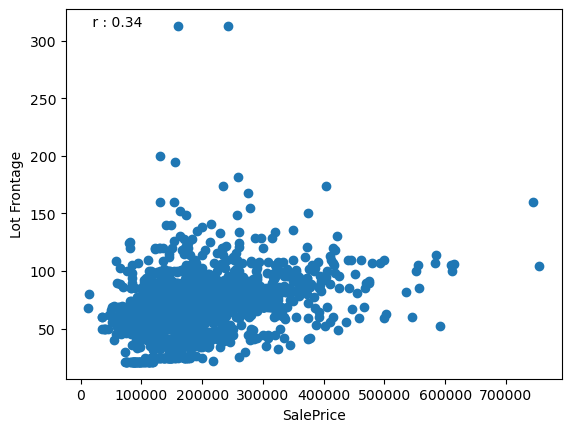

In [46]:
plt.scatter(data_df['SalePrice'], data_df['Lot Frontage'])
plt.xlabel('SalePrice')
plt.ylabel('Lot Frontage')

r = np.corrcoef(data_df['SalePrice'], data_df['Lot Frontage'])
plt.text(data_df['SalePrice'].min(),data_df['Lot Frontage'].max(),f' r : {round(r[0,1],2)} ')

plt.show()

### Outliers :
On the continuous variable we saw some outliers on  'Lot Frontage', 'Lot Area', 'Mas Vnr Area',... Some point seems really far and the distribution plot seems crushed to the left.

Firstly I plane to filter with a Z-score only on the right side of the plot (z-score positif) and fixing a threshold between 3.5 - 4. But a fix z-score threshold for all the variable could filter too much or not enough.

I propose to filter on the standard deviation, values superior to mean + 3*std are consider as outliers. **To reformulate, chat GPT**


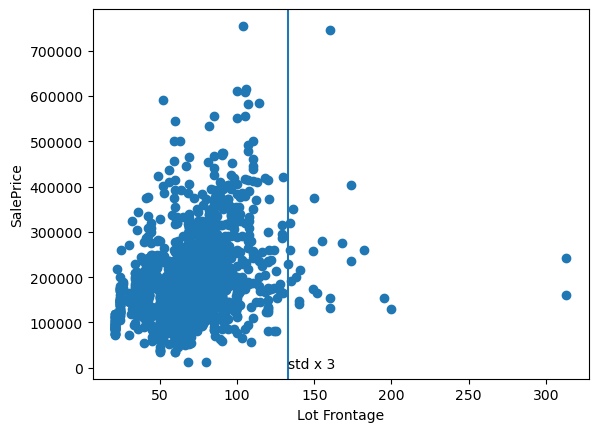

In [47]:
plt.scatter(data_df['Lot Frontage'], data_df['SalePrice'])
plt.xlabel('Lot Frontage')
plt.ylabel('SalePrice')

std3 = data_df['Lot Frontage'].mean() + np.std(data_df['Lot Frontage'])* 3
plt.axvline(x = std3)
plt.text(std3, 0, 'std x 3' )

plt.show()

In [48]:
data_df.loc[data_df['BsmtFin SF 2'] > 0, 'BsmtFin SF 2'].mean() + (np.std(data_df.loc[data_df['BsmtFin SF 2'] > 0, 'BsmtFin SF 2']) * 3)

1315.992893941867

In [49]:
data_df['BsmtFin SF 2'].mean() + (np.std(data_df['BsmtFin SF 2']) * 3)

569.546496094608

We check outlier on continuous variable only. The discrete one have a a range of value limited and we already check them before when we plot them in the Graphical Representation part.  **Add a link to the plot**

Most of the variables get a value > 0 only if the feature associated is in the house. It's seems more fair to discard values = 0 to identify outlier only among entries with the feature associated.

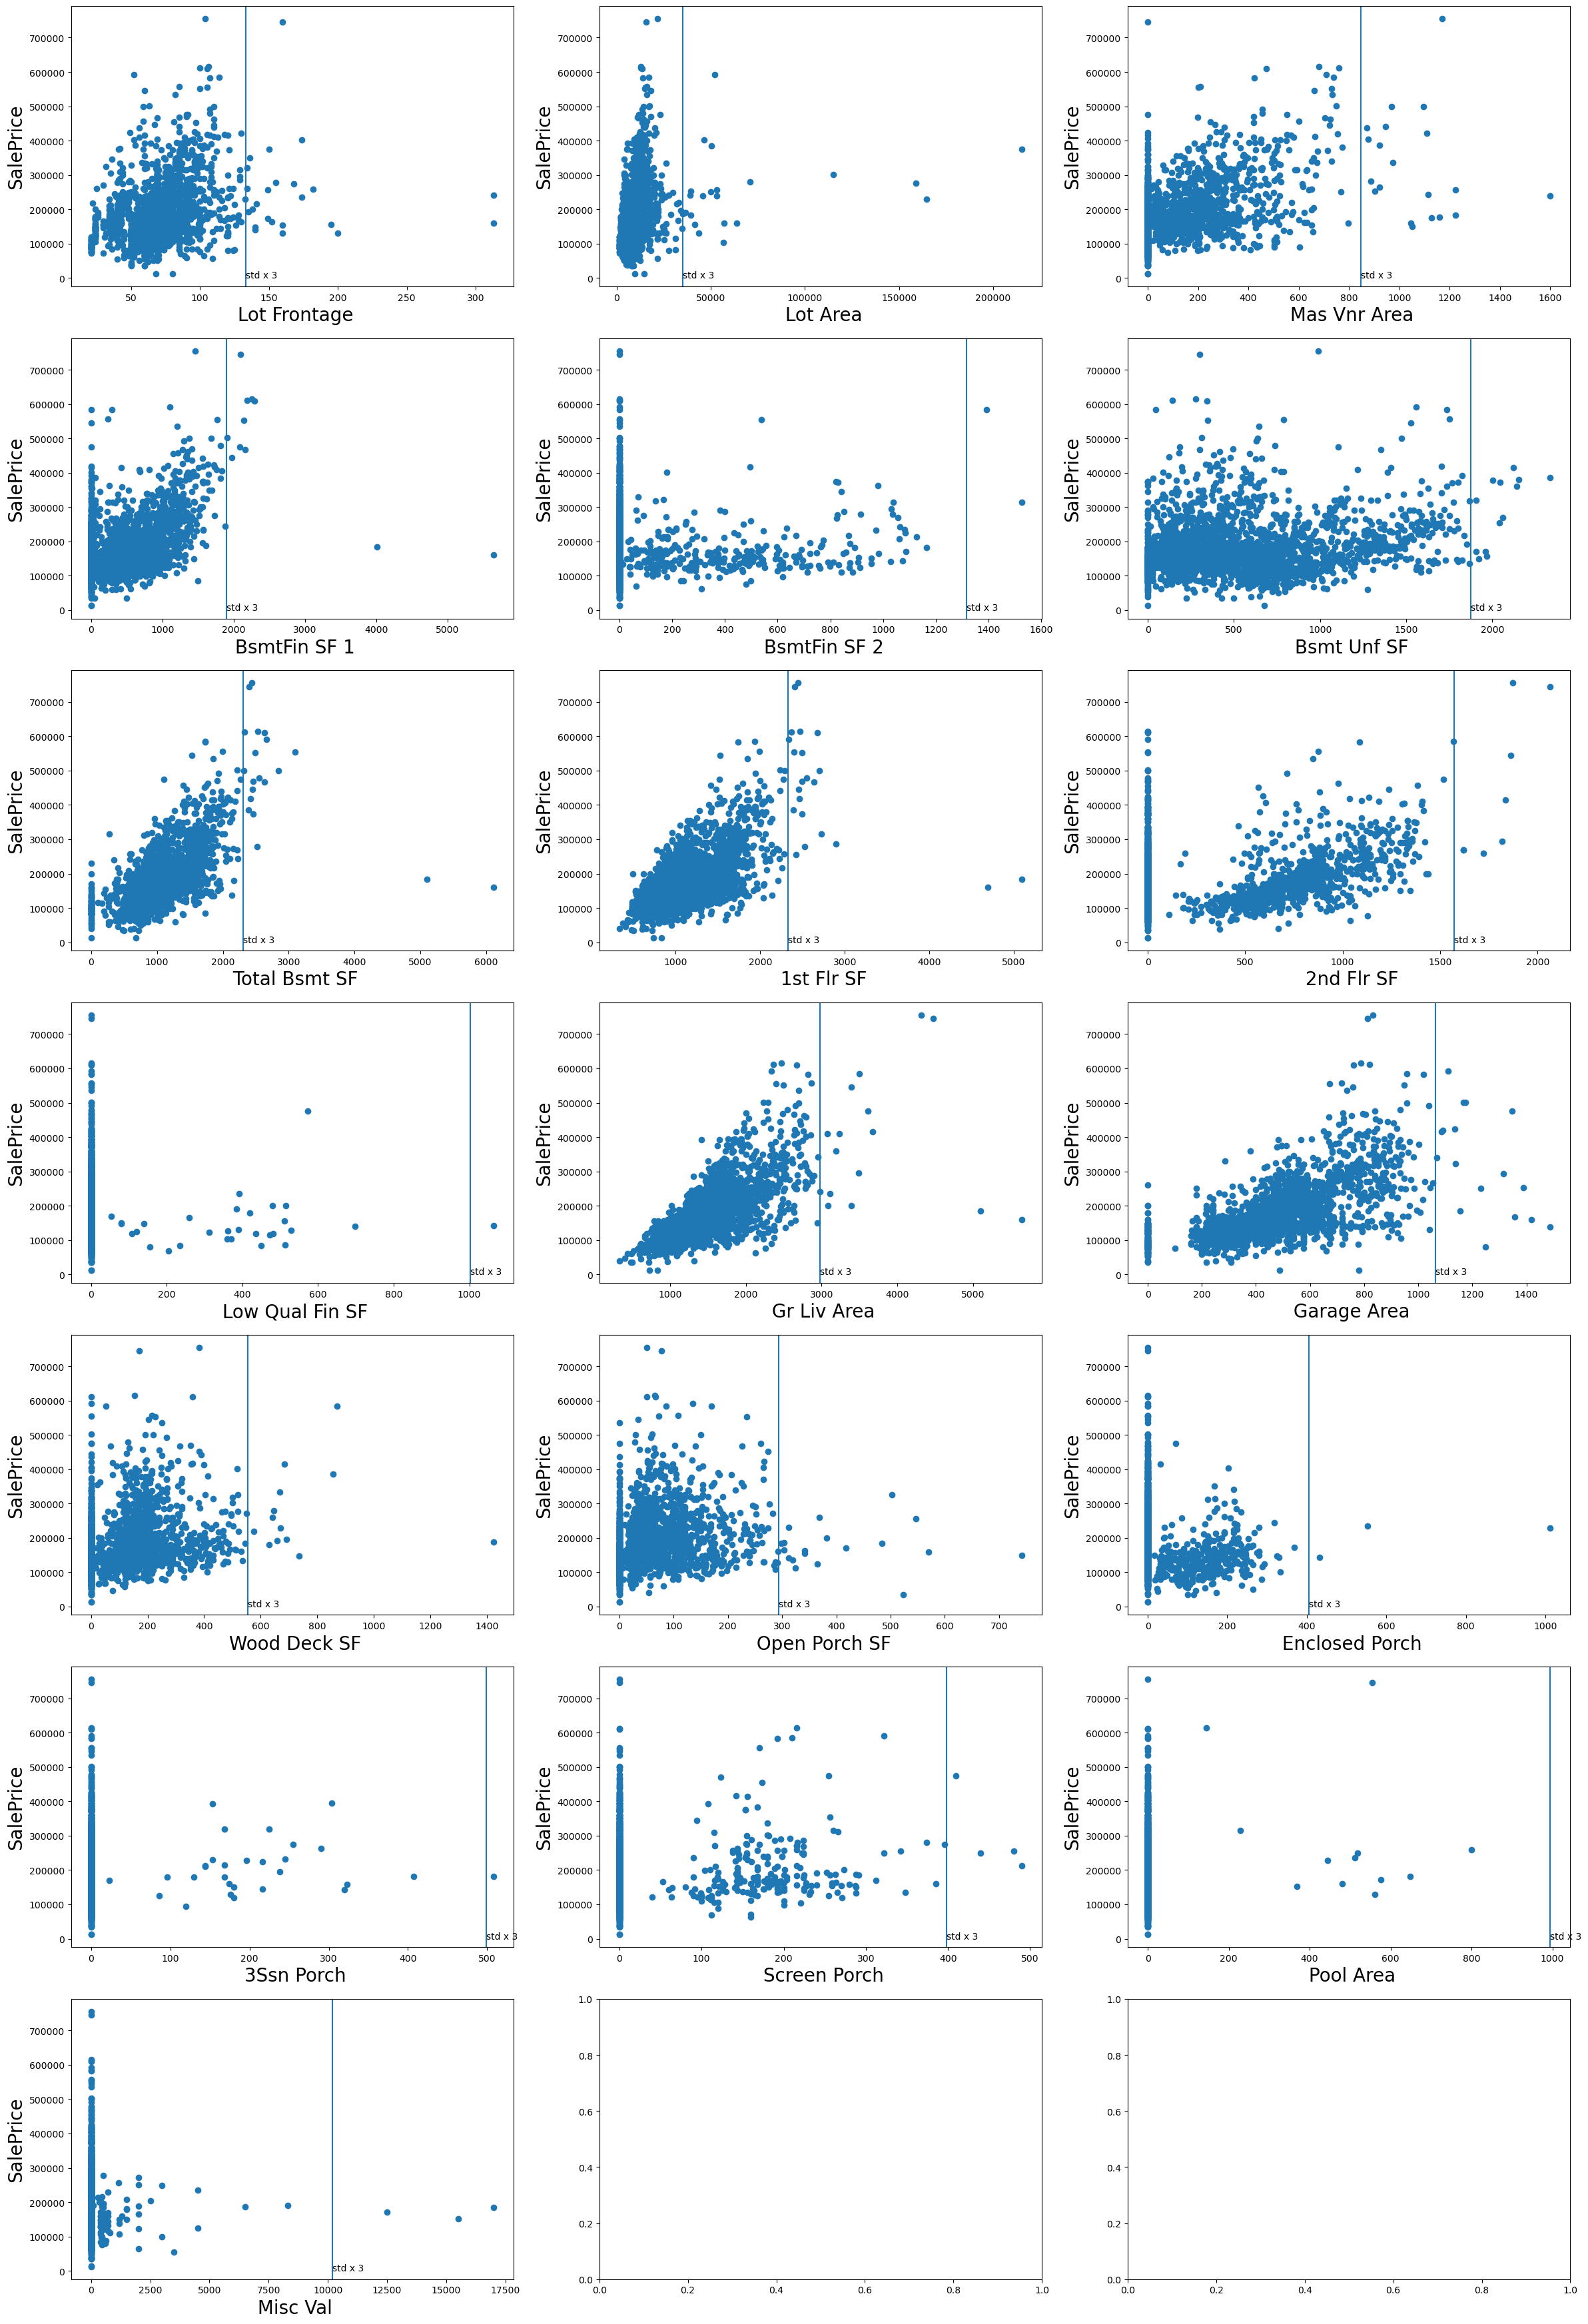

In [50]:
nb_cols = 3 # int(np.sqrt(len(cat_col)))
nb_rows = 7 # int(np.sqrt(len(cat_col))) +1

fig, axes = plt.subplots(nrows = nb_rows, 
                         ncols = nb_cols, 
                         figsize = (8*nb_cols,5*nb_rows)) # sets the width and height of the figure (in inches)
x = 0
y = 0
for i in range(len(cont_col)):#cont_col

    std3 = data_df.loc[data_df[cont_col[i]] > 0, cont_col[i]].mean() + (np.std(data_df.loc[data_df[cont_col[i]] > 0, cont_col[i]])* 3)
    
    axes[x,y].scatter( y=data_df['SalePrice'], x=data_df[cont_col[i]])# hue=col_cat[i],
    axes[x,y].set_xlabel(f' {cont_col[i]}', fontsize=20)
    axes[x,y].set_ylabel('SalePrice', fontsize=20)
 
    axes[x,y].axvline(x = std3)
    axes[x,y].text(std3, 0, 'std x 3' ) 

    if (y+1)/nb_cols == 1:
        y = -1
        x = x + 1
    y = y + 1
    
        
fig.tight_layout()

plt.show()

In [51]:
filter_df = data_df[cont_col].copy()
for i in range(len(cont_col)):
    std3 = data_df.loc[data_df[cont_col[i]] > 0, cont_col[i]].mean() + (np.std(data_df.loc[data_df[cont_col[i]] > 0, cont_col[i]])* 3)
    filter_df[cont_col[i]] = (data_df[cont_col[i]] < std3)

filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401 entries, 0 to 2429
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Lot Frontage     2401 non-null   bool 
 1   Lot Area         2401 non-null   bool 
 2   Mas Vnr Area     2401 non-null   bool 
 3   BsmtFin SF 1     2401 non-null   bool 
 4   BsmtFin SF 2     2401 non-null   bool 
 5   Bsmt Unf SF      2401 non-null   bool 
 6   Total Bsmt SF    2401 non-null   bool 
 7   1st Flr SF       2401 non-null   bool 
 8   2nd Flr SF       2401 non-null   bool 
 9   Low Qual Fin SF  2401 non-null   bool 
 10  Gr Liv Area      2401 non-null   bool 
 11  Garage Area      2401 non-null   bool 
 12  Wood Deck SF     2401 non-null   bool 
 13  Open Porch SF    2401 non-null   bool 
 14  Enclosed Porch   2401 non-null   bool 
 15  3Ssn Porch       2401 non-null   bool 
 16  Screen Porch     2401 non-null   bool 
 17  Pool Area        2401 non-null   bool 
 18  Misc Val

We have 19 continuous variables. I want to plot the number of outilier detected in function of the SalePrice. My hypothesis is that extremme values can be associated to higher Sale Price. A important surface for basement or floor or a big wood deck could be associated to an expensive house.

Text(0, 0.5, 'SalePrice')

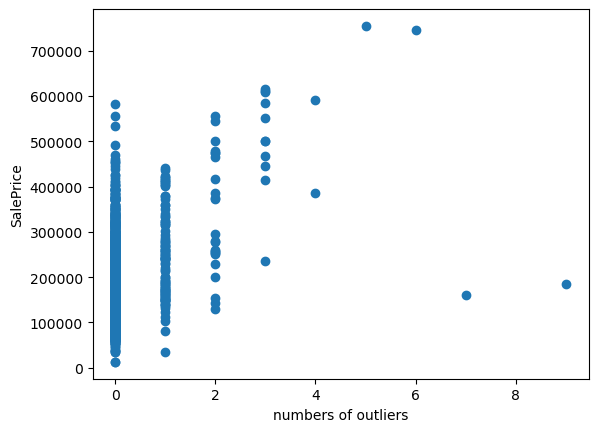

In [52]:
plt.scatter(x= 19 - filter_df.select_dtypes(include='bool').sum(axis=1), y = data_df['SalePrice'])
plt.xlabel('numbers of outliers')
plt.ylabel('SalePrice')

Cumulate more than 2 extreme values seems associated to Sale Price. We see a correlation and the 2 most expensive houses have extreme values in multiple variables.

We will apply this filter because even if this extreme values seems correlated with high price they have tendency to reduce shrink the data.  

We apply the filters : 

In [53]:
filter = filter_df.select_dtypes(include='bool').sum(axis=1) == 19
data_df = data_df[filter]

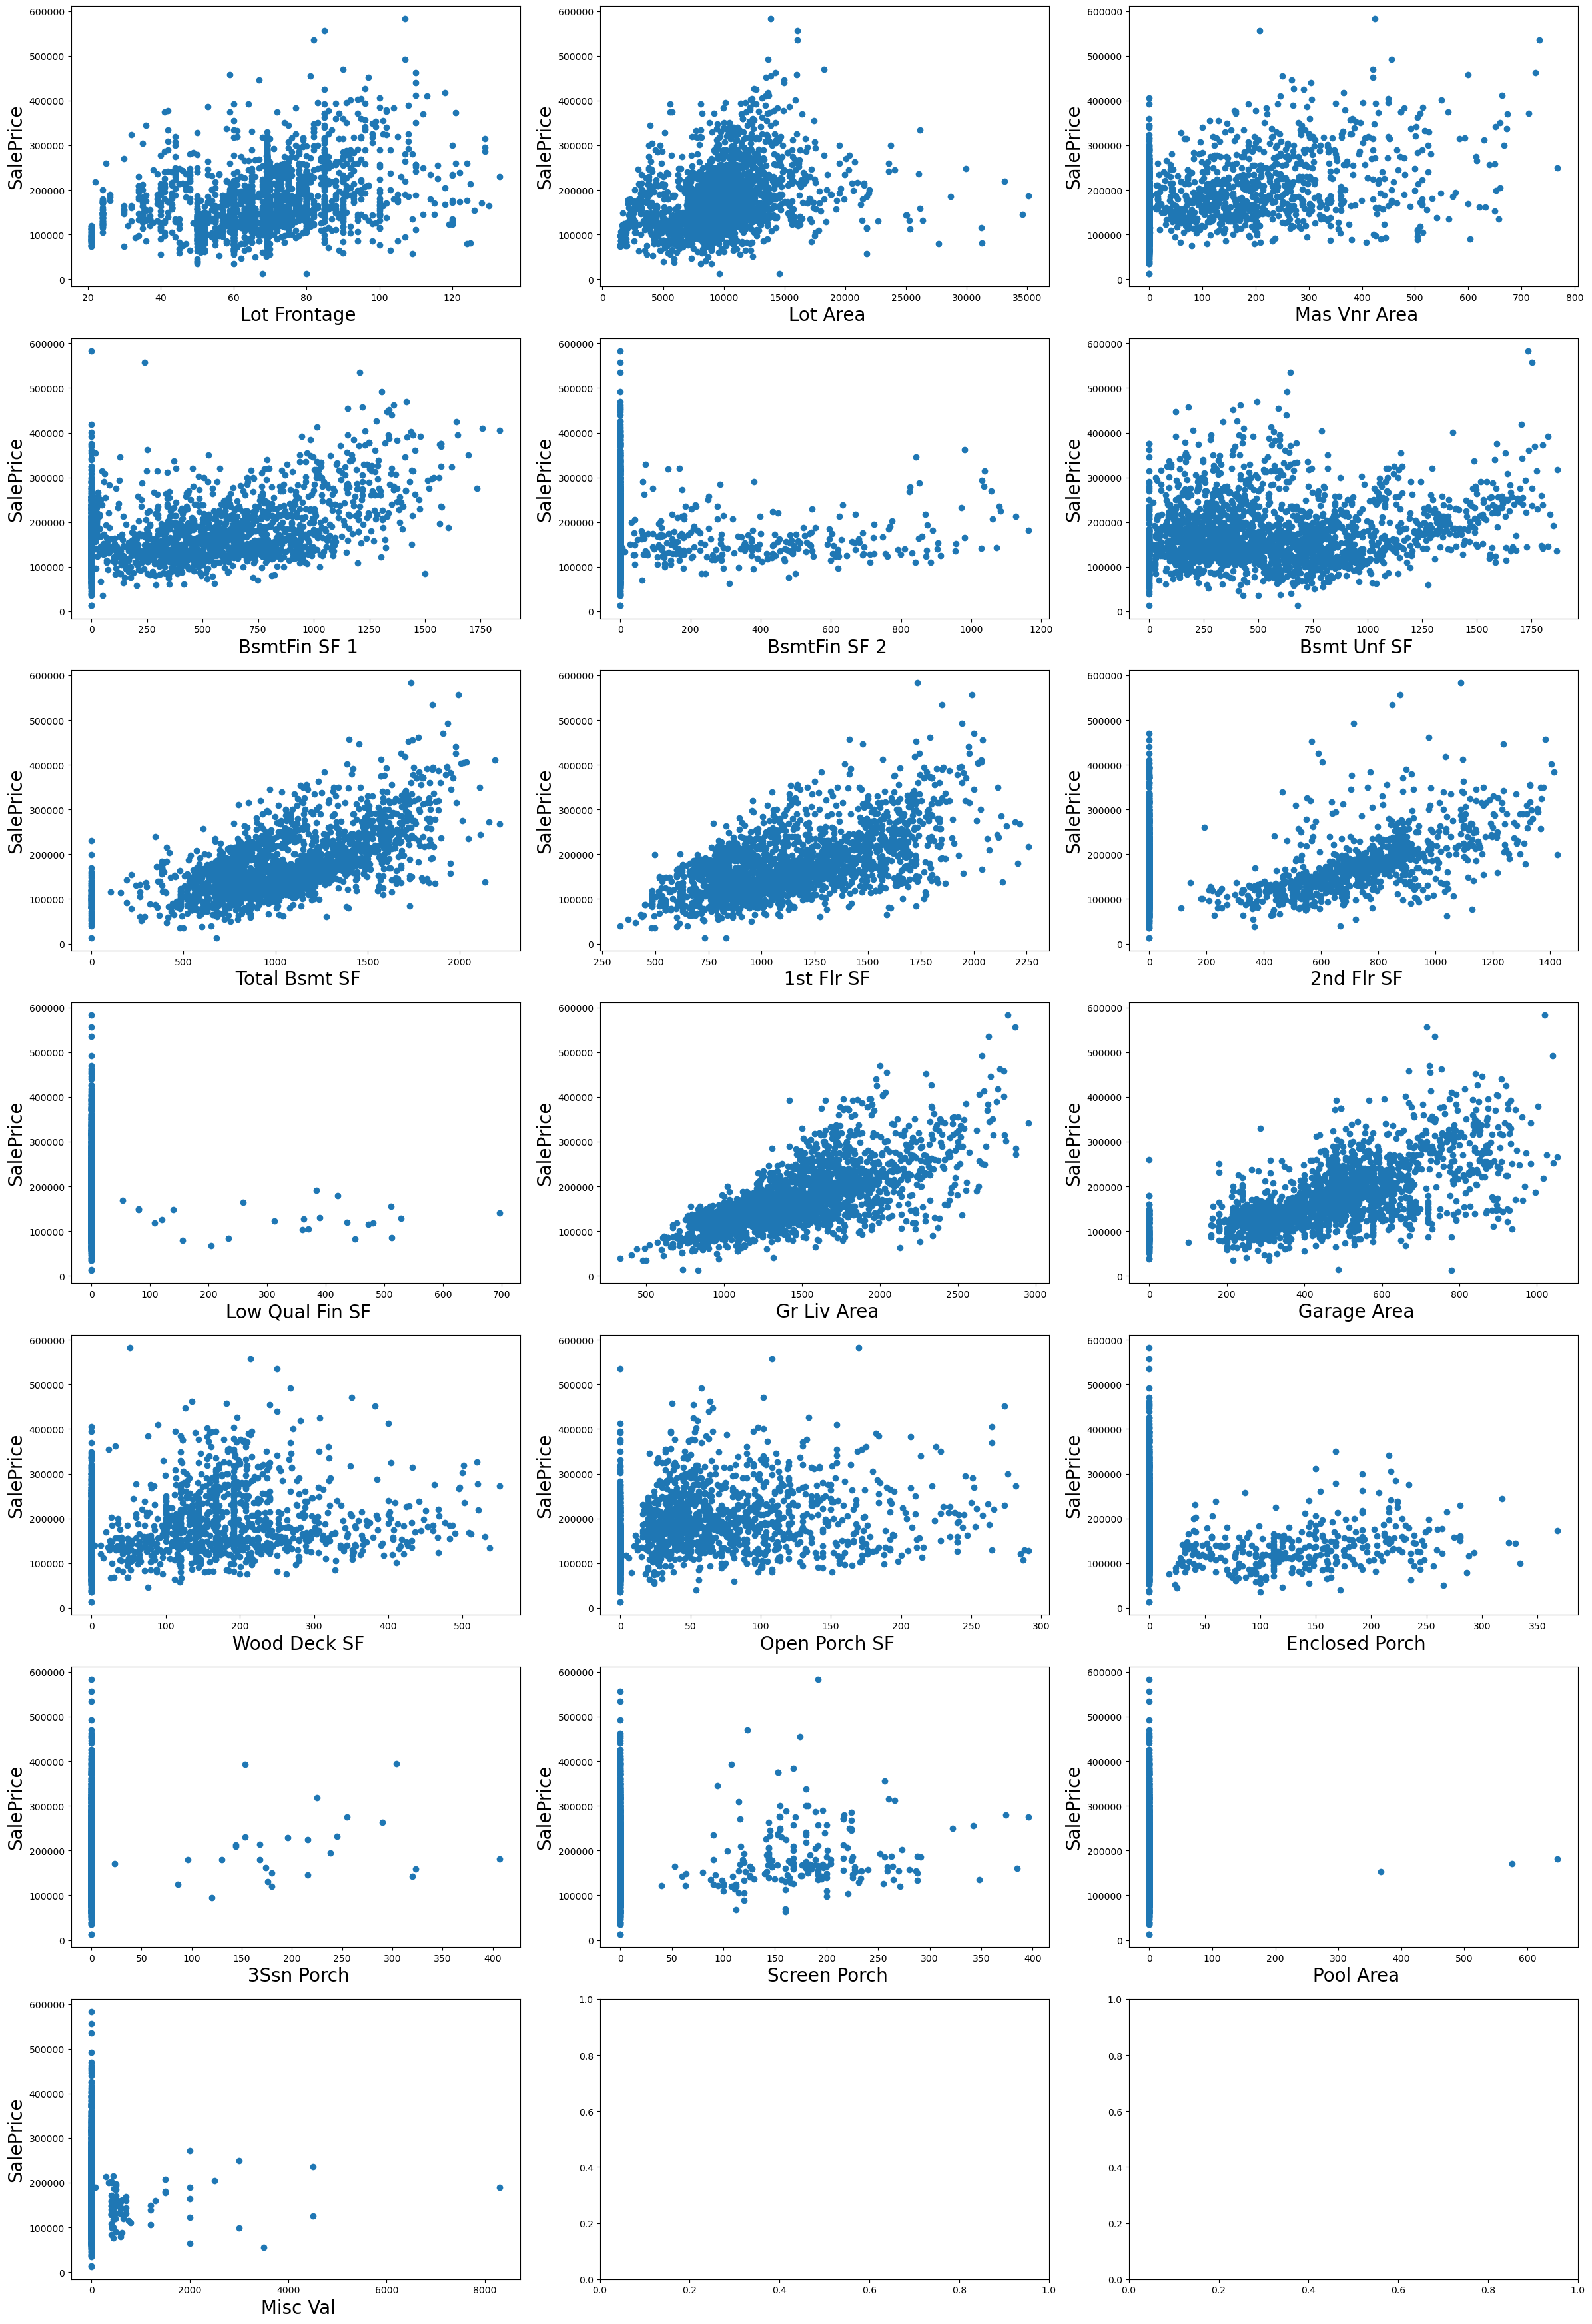

In [54]:
nb_cols = 3 # int(np.sqrt(len(cat_col)))
nb_rows = 7 # int(np.sqrt(len(cat_col))) +1

fig, axes = plt.subplots(nrows = nb_rows, 
                         ncols = nb_cols, 
                         figsize = (8*nb_cols,5*nb_rows)) # sets the width and height of the figure (in inches)
x = 0
y = 0
for i in range(len(cont_col)):#cont_col

    #std3 = data_df.loc[data_df[cont_col[i]] > 0, cont_col[i]].mean() + (np.std(data_df.loc[data_df[cont_col[i]] > 0, cont_col[i]])* 3)
    
    axes[x,y].scatter( y=data_df['SalePrice'], x=data_df[cont_col[i]])# hue=col_cat[i],
    axes[x,y].set_xlabel(f' {cont_col[i]}', fontsize=20)
    axes[x,y].set_ylabel('SalePrice', fontsize=20)
    
    #axes[x,y].plot(df_test1[cont_col[i]], df_test1['SalePrice'], color='red', marker='o', linestyle='none')
    
    #axes[x,y].axvline(x = std3)
    #axes[x,y].text(std3, 0, 'std x 3' ) 

    if (y+1)/nb_cols == 1:
        y = -1
        x = x + 1
    y = y + 1
    
        
fig.tight_layout()

plt.show()

I'm glad with the result.

In [55]:
data_df.shape

(2258, 79)

## Feature encoding

No polynomial feature based on the scatter plot.
- convert ordinal into discrete values
- Hot encoded the categorical variable
- Log transform Shrink variables



### Ordinal to discrete
First transformation : We will change ordinal variables into discrete ones when it's a notation easily convertible into a range of values :

In [56]:
cat_ord_col

['Lot Shape',
 'Utilities',
 'Land Slope',
 'Overall Qual',
 'Overall Cond',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence']

In [57]:
data_df['Overall Qual'] = data_df['Overall Qual'].map(int)
data_df['Overall Cond'] = data_df['Overall Cond'].apply(int)

The general rules that we apply to transform categorical values into discrete is to give 0 if the entrie have not the feature, 1 for the less valuable state of the feature and increase by 1 for each categorie more and more valuable.

It's have been done in accordance with the documentation and the observation in the boxplot in the section "graphical representation" :

- Lot Shape :IR3 = 1; IR2 = 2; IR1 = 3; Reg = 4
- Utilities : ELO = 0; NoSeWa = 1; NoSewr = 2; AllPub = 3
- Land Slope : Gtl = 0; Mod = 0.5; Sev = 1
- Overall Qual : it's already numbers
- Overall Cond : it's already numbers
- Exter Qual : Po = 1; Fa = 2; TA = 3; Gd = 4; Ex = 5
- Exter Cond : Po = 1; Fa = 2; TA = 3; Gd = 4; Ex = 5
- Bsmt Qual : NA = 0; Po = 1; Fa = 2; TA = 3; Gd = 4; Ex = 5
- Bsmt Cond : NA = 0; Po = 1; Fa = 2; TA = 3; Gd = 4; Ex = 5
- Bsmt Exposure : NA = 0; No = 1; Mn = 2; Av = 3; Gd = 4
- BsmtFin Type 1 : NA = 0; unf = 1; LwQ = 2; Rec = 3; BLQ = 4; ALQ = 5; GLQ = 6 #We consider that having living quarters bring more value than just a recreation room in the basement
- BsmtFin Type 2 : NA = 0; unf = 1; LwQ = 2; Rec = 3; BLQ = 4; ALQ = 5; GLQ = 6 #We consider that having living quarters bring more value than just a recreation room in the basement
- Heating QC : Po = 1; Fa = 2; TA = 3; Gd = 4; Ex = 5
- Electrical : Mix = 1; FuseP = 2; FuseF = 3; FuseA = 4; SBrkr = 5
- Kitchen Qual : Po = 1; Fa = 2; TA = 3; Gd = 4; Ex = 5
- Functional : Sal = 0; Sev = 1; Maj2 = 2; Maj1 = 3; Mod = 4; Min2 = 5; Min1 = 6; Typ = 7 # I put this variable in the question mark list because we are not certain of what cover the categorie if the notation convertion is really fair and, this variable is caver by overal Qual variable. 
- Garage Finish : NA = 0; Unf = 1; RFn = 2; Fin = 3 # I have a question an unfinished garage isn't worse than no garage at all. Nope How did I know that I redo the boxplot cell after correction NA -> "NA"
- Garage Qu : NA = 0; Po = 1; Fa = 2; TA = 3; Gd = 4; Ex = 5
- Garage Cond : NA = 0; Po = 1; Fa = 2; TA = 3; Gd = 4; Ex = 5
- Fireplace Qu : NA = 0; Po = 1; Fa = 2; TA = 3; Gd = 4; Ex = 5
- Paved Drive : N = 0; P = 1; Y = 2 #Thank to the boxplot it's seems better to have paved then partial pavement then Dirt/Gravel
- Pool QC : NA = 0; Fa = 1; TA = 2; Gd = 3; Ex = 4 
- Fence : NA = 0; MnWw = 1; GdWo = 2; MnPrv = 3; GdPrv = 4

In [58]:
# map dictionnaries
lot_shape_mapping= {'IR3' : 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
utilities_mapping= {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}
land_slope_mapping = {'Gtl': 0, 'Mod': 0.5, 'Sev': 1}
exter_qual_cond_mapping = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
bsmt_qual_cond_mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
bsmt_exposure_mapping = {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
bsmt_fin_type_mapping = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
heating_qc_mapping = exter_qual_cond_mapping  # same mapping as Exter Qual/Cond
kitchen_qual_mapping = exter_qual_cond_mapping  # same mapping as Exter Qual/Cond
functional_mapping = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
garage_finish_mapping = {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
garage_qual_mapping = bsmt_qual_cond_mapping  # same mapping as Bsmt Qual/Cond
garage_cond_mapping = bsmt_qual_cond_mapping  # same mapping as Bsmt Qual/Cond
fireplace_qu_mapping = bsmt_qual_cond_mapping  # same mapping as Bsmt Qual/Cond
paved_drive_mapping = {'N': 0, 'P': 1, 'Y': 2}
pool_qc_mapping = {'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
fence_mapping = {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
Electrical_mapping = {'Mix' : 1, 'FuseP' : 2, 'FuseF' : 3, 'FuseA': 4, 'SBrkr' : 5}

# map application
data_df['Lot Shape'] = data_df['Lot Shape'].replace(lot_shape_mapping)
data_df['Utilities'] = data_df['Utilities'].replace(utilities_mapping)
data_df['Land Slope'] = data_df['Land Slope'].replace(land_slope_mapping)
data_df['Exter Qual'] = data_df['Exter Qual'].replace(exter_qual_cond_mapping)
data_df['Exter Cond'] = data_df['Exter Cond'].replace(exter_qual_cond_mapping)
data_df['Bsmt Qual'] = data_df['Bsmt Qual'].replace(bsmt_qual_cond_mapping)
data_df['Bsmt Cond'] = data_df['Bsmt Cond'].replace(bsmt_qual_cond_mapping)
data_df['Bsmt Exposure'] = data_df['Bsmt Exposure'].replace(bsmt_exposure_mapping)
data_df['BsmtFin Type 1'] = data_df['BsmtFin Type 1'].replace(bsmt_fin_type_mapping)
data_df['BsmtFin Type 2'] = data_df['BsmtFin Type 2'].replace(bsmt_fin_type_mapping)
data_df['Heating QC'] = data_df['Heating QC'].replace(heating_qc_mapping)
data_df['Kitchen Qual'] = data_df['Kitchen Qual'].replace(kitchen_qual_mapping)
data_df['Functional'] = data_df['Functional'].replace(functional_mapping)
data_df['Garage Finish'] = data_df['Garage Finish'].replace(garage_finish_mapping)
data_df['Garage Qual'] = data_df['Garage Qual'].replace(garage_qual_mapping)
data_df['Garage Cond'] = data_df['Garage Cond'].replace(garage_cond_mapping)
data_df['Fireplace Qu'] = data_df['Fireplace Qu'].replace(fireplace_qu_mapping)
data_df['Paved Drive'] = data_df['Paved Drive'].replace(paved_drive_mapping)
data_df['Pool QC'] = data_df['Pool QC'].replace(pool_qc_mapping)
data_df['Fence'] = data_df['Fence'].replace(fence_mapping)
data_df['Electrical'] = data_df['Electrical'].replace(Electrical_mapping )

# Vérification du résultat
print(data_df[cat_ord_col].describe())

         Lot Shape    Utilities   Land Slope  Overall Qual  Overall Cond  \
count  2258.000000  2258.000000  2258.000000   2258.000000   2258.000000   
mean      3.605846     2.998229     0.022808      6.014172      5.581931   
std       0.554996     0.051529     0.112520      1.365689      1.120032   
min       1.000000     1.000000     0.000000      1.000000      1.000000   
25%       3.000000     3.000000     0.000000      5.000000      5.000000   
50%       4.000000     3.000000     0.000000      6.000000      5.000000   
75%       4.000000     3.000000     0.000000      7.000000      6.000000   
max       4.000000     3.000000     1.000000     10.000000      9.000000   

        Exter Qual   Exter Cond    Bsmt Qual    Bsmt Cond  Bsmt Exposure  ...  \
count  2258.000000  2258.000000  2258.000000  2258.000000    2258.000000  ...   
mean      3.368468     3.090345     3.436227     2.914526       1.598317  ...   
std       0.558272     0.379801     0.909098     0.593311       1.049226

In [59]:
# Variable to remove from categorical list and to place into numerical list :
transformed_vars = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                    'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC','Electrical', 'Kitchen Qual', 'Functional',
                    'Fireplace Qu', 'Garage Finish', 'Garage Qual','Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

# remove from categorical list: cat_ord_col and cat_col
cat_ord_col = [var for var in cat_ord_col if var not in transformed_vars]
cat_col = [var for var in cat_col if var not in transformed_vars]

# to add to numerical list : 
num_col.extend(transformed_vars)
disc_col.extend(transformed_vars)

# result
print("- Categorical ordinal columns:", cat_ord_col)
print("- Categorical columns:", cat_col)
print( " ")
print("- Numerical columns:", num_col)
print("- Discrete columns:", disc_col)

- Categorical ordinal columns: []
- Categorical columns: ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Sale Type', 'Sale Condition']
 
- Numerical columns: ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Ex

There is not anymore any ordinal variables.

### Hot-encoded

Second : We hot encoded variables. 

In [60]:
pd.get_dummies(data_df, columns=cat_col).head()

Lot Frontage  Lot Area  Lot Shape  Utilities  Land Slope  Overall Qual  \
0     69.137896      8795          3          3         0.0             7   
1     75.000000     10170          4          3         0.0             6   
2     21.000000      2001          4          3         0.0             4   
3     70.000000     10552          3          3         0.0             5   
4     60.000000     10120          3          3         0.0             7   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  Sale Type_New  \
0             5        2000            2000           0.0  ...              0   
1             6        1951            1951         522.0  ...              0   
2             5        1970            1970          80.0  ...              0   
3             5        1959            1959           0.0  ...              0   
4             4        1910            1950           0.0  ...              0   

   Sale Type_Oth  Sale Type_VWD  Sale Type_WD   Sale Condition_Abnorml  \
0              0              0              1                       0   
1              0              0              1                       0   
2              0              0              1                       0   
3              0              0              1                       0   
4              0              0              1                       0   

   Sale Condition_AdjLand  Sale Condition_Alloca  Sale Condition_Family  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   Sale Condition_Normal  Sale Condition_Partial  
0                      1                       0  
1                      1                       0  
2                      1                       0  
3                      1                       0  
4                      1                       0  

[5 rows x 237 columns]

In [61]:
data_df = pd.get_dummies(data_df, columns=cat_col)

We check correlation between all the numerical features before starting feature ingeneering. This could give us some clue on how to transform our feature to explain Sale Prices :

## Feature ingeneering 


### Log transform
After the change apply across the differents step before we check how it will affect the variable if we log transform them: 


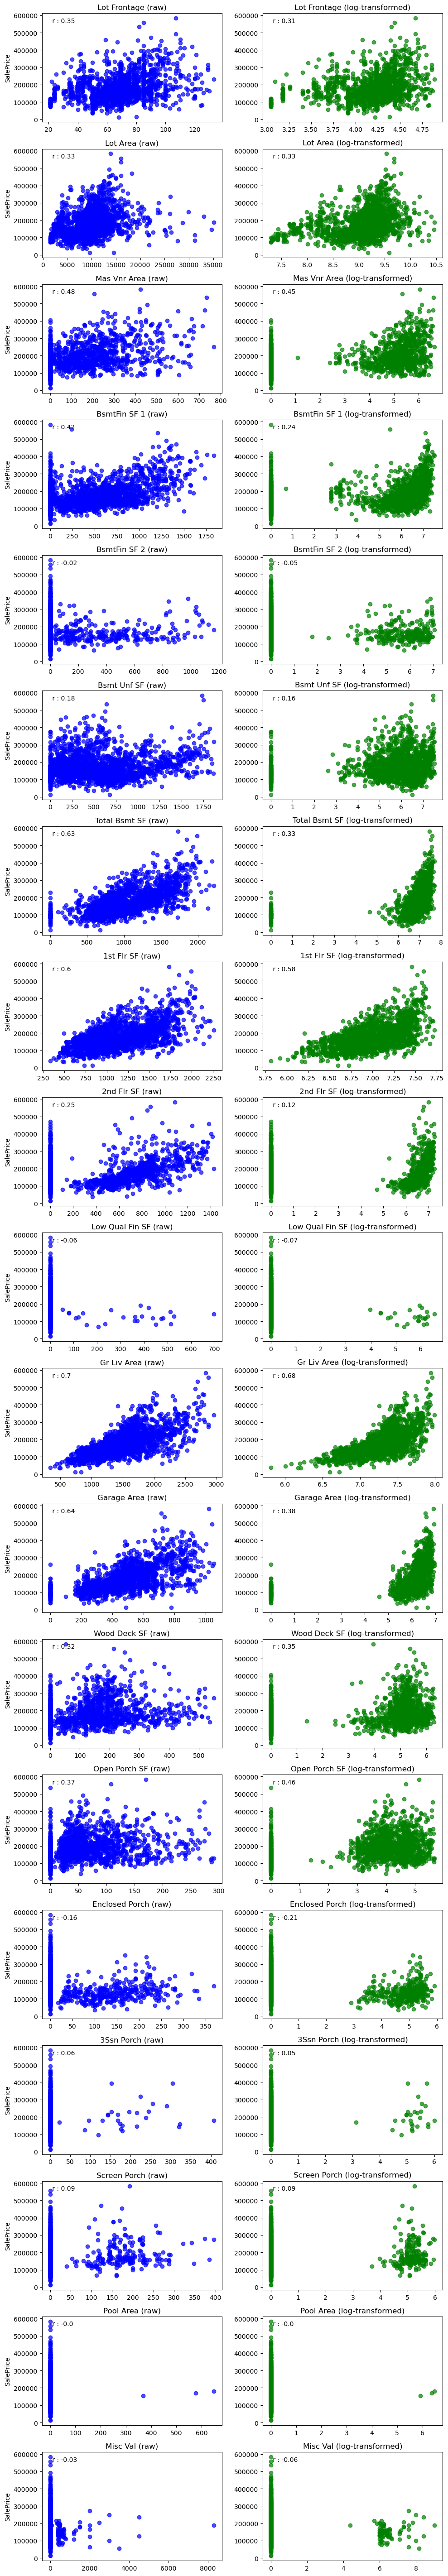

In [62]:
# Calcul des logarithmes, en ajoutant une petite constante pour éviter le log(0)

df_log = np.log(data_df[cont_col].replace(0,1))

#epsilon = 1e-6
#df_log = np.log(data_df[cont_col] + epsilon)

# Nombre de variables (colonnes) à tracer
num_vars = len(cont_col)

# Création des subplots
fig, axes = plt.subplots(nrows=num_vars, ncols=2, figsize=(10, 3 * num_vars))

for i, col in enumerate(cont_col):
    # Histogramme de la variable brute
    axes[i, 0].scatter(y = data_df['SalePrice'], x = data_df[cont_col][col], color='blue', alpha=0.7)
    axes[i, 0].set_title(f'{col} (raw)')
    axes[i, 0].set_ylabel("SalePrice")
    r = np.corrcoef(data_df['SalePrice'], data_df[cont_col][col])
    axes[i, 0].text(data_df[cont_col][col].min(),data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

    
    # Histogramme de la variable transformée par le log
    axes[i, 1].scatter(y = data_df['SalePrice'],x =  df_log[col], color='green', alpha=0.7)
    axes[i, 1].set_title(f'{col} (log-transformed)')
    r = np.corrcoef(data_df['SalePrice'], df_log[col])
    axes[i, 1].text(df_log[col].min(),data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

# Ajustement de l'espacement entre les plots
plt.tight_layout()
plt.show()

It didn't seems interesting to transform any of this variables.

The variable related to Porsch or wood deck have many entries with no values (values as 0) because none of this features exist for many entries.

### New Features :

For multiple element we have Condition, Quality and Surface/Area. One way to reduce the number of feature could be to combine this informations for each element and transform it in one generale note. We multiply the feature or add them between them like this : Qual * Cond or Qual * SF/AREA or  Qual * Cond * SF.

We have: 
- Total Surface : 'Total Bsmt SF' + '2nd Flr SF' + '1st Flr SF'
- 'Overall Qual' and 'Overall Cond'
- 'Exter Qual' and 'Exter Cond'
- 'Bsmt Qual'and 'Bsmt Cond' and 'Total Bsmt SF'
- 'BsmtFin Type 1' and 'BsmtFin SF 1' 
- 'BsmtFin Type 2', 'BsmtFin SF 2'
- 'Garage Area', 'Garage Qual', 'Garage Cond'
- 'Lot Area', 'Lot Shape'

I want to test if the total SF is correlated to the Sale Price better than the partial surface :

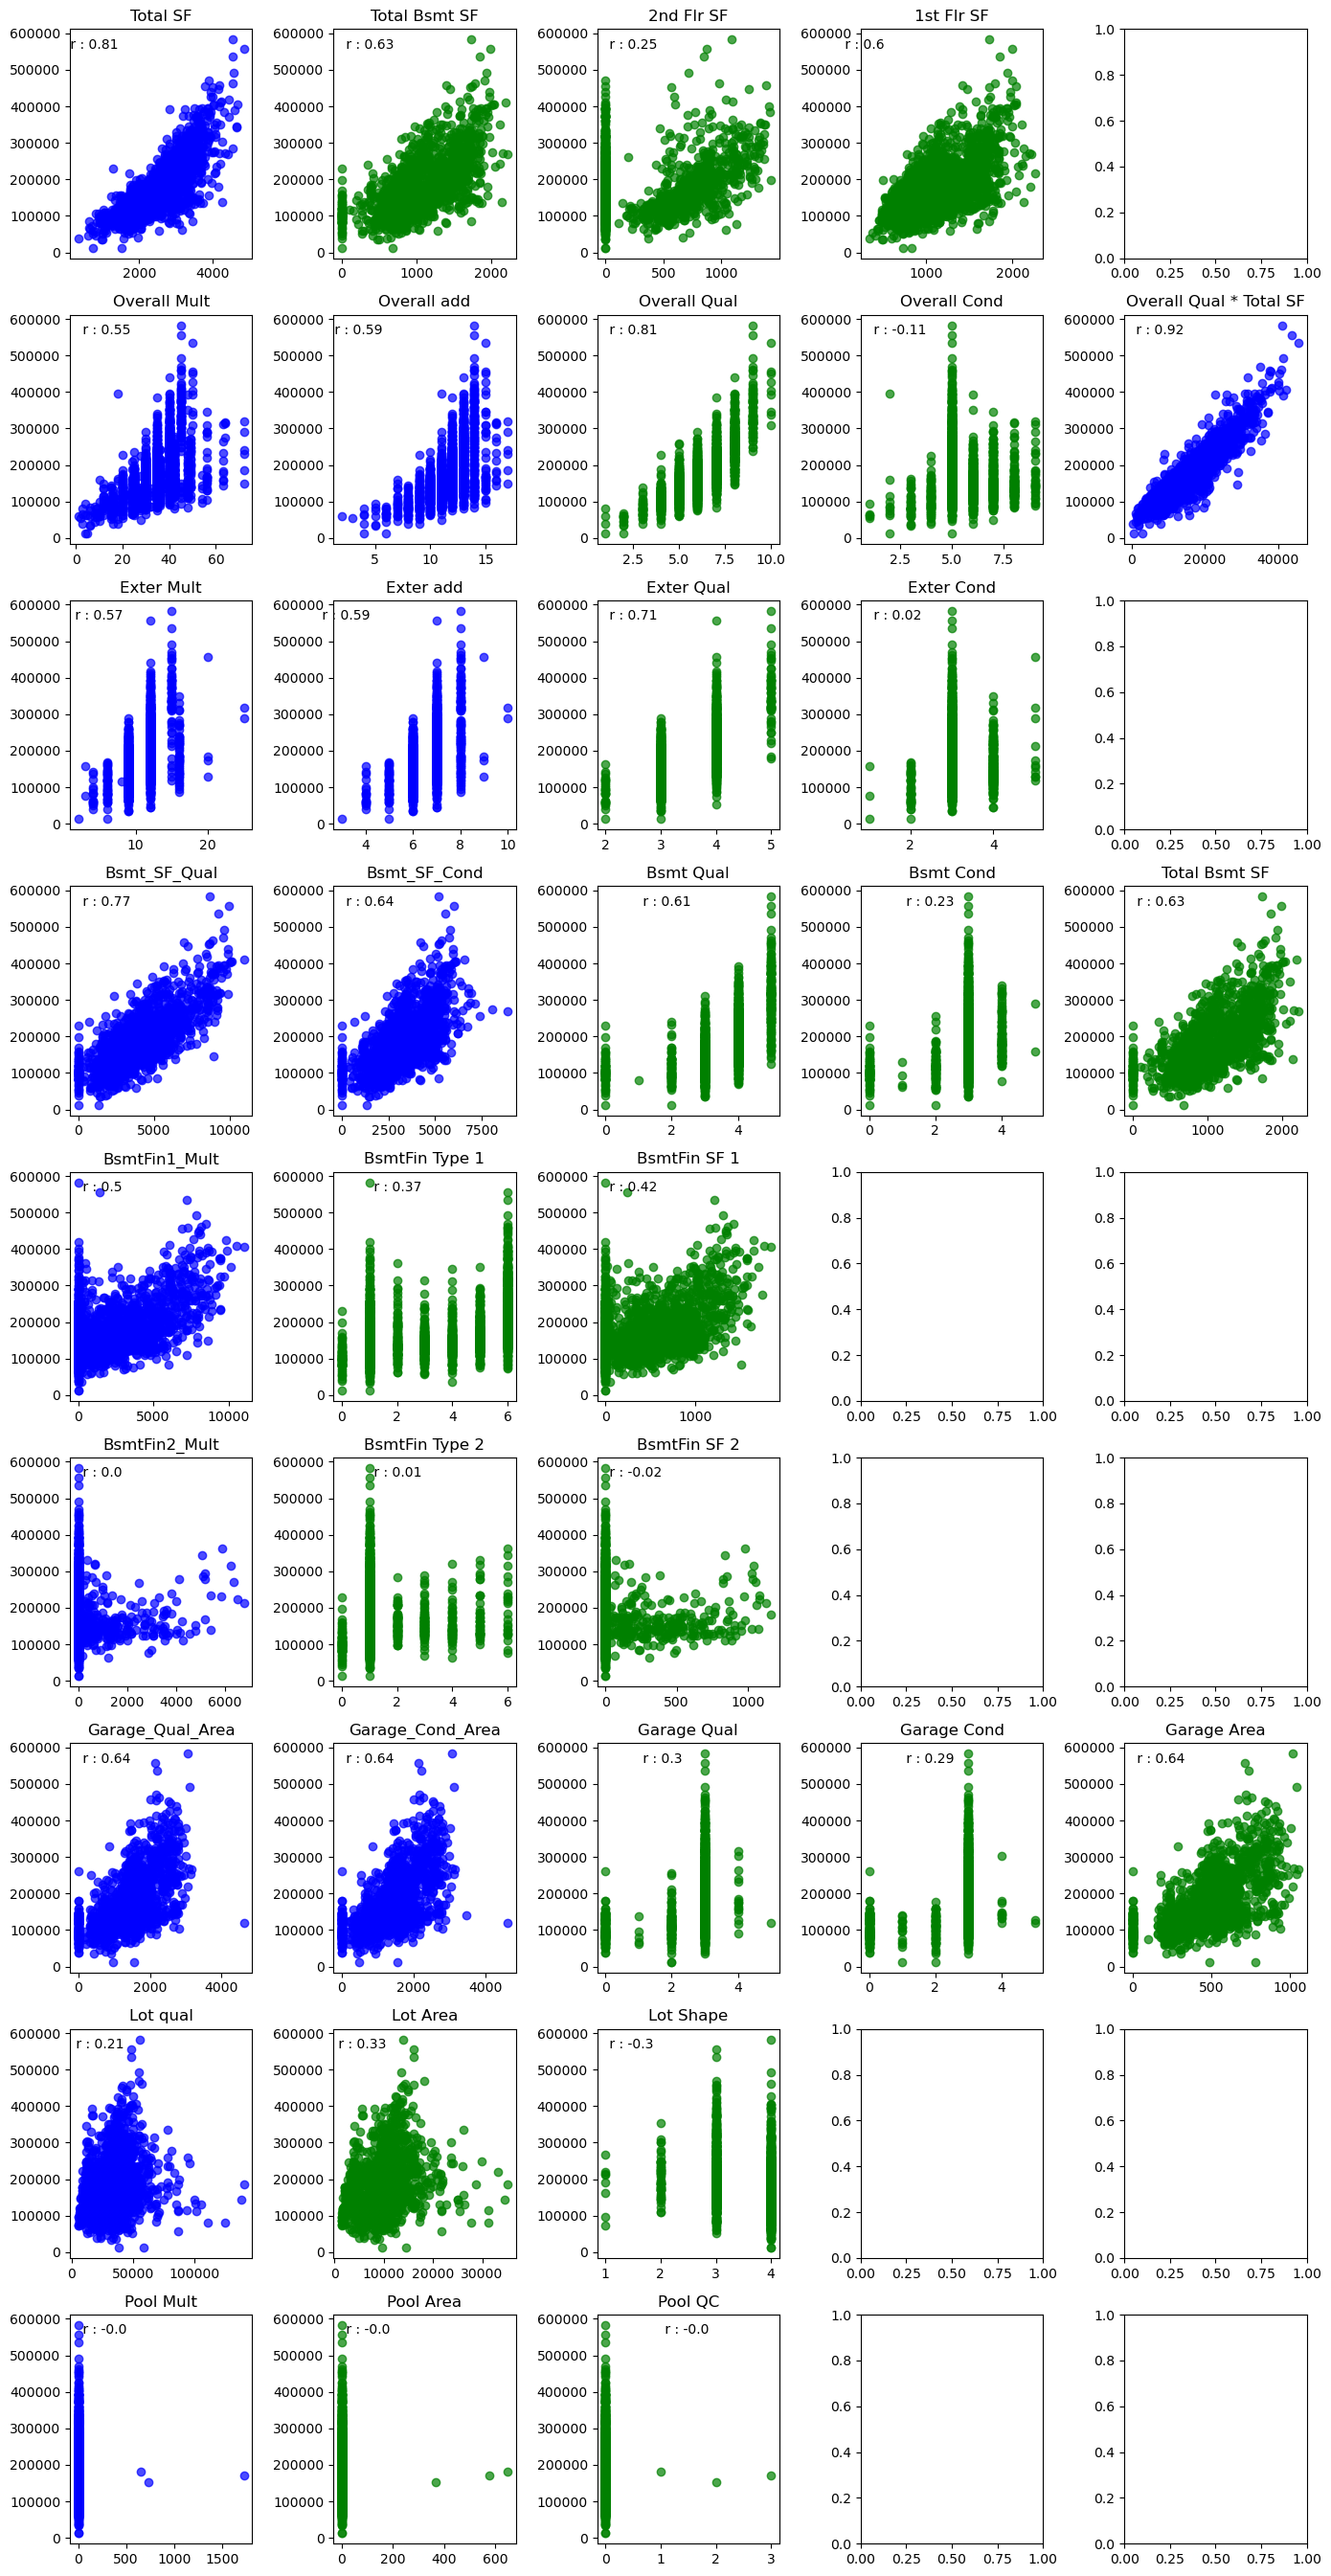

In [63]:
# Subplot creation :
nr = 9
fig, axes = plt.subplots(nrows=nr, ncols=5, figsize=(14, nr*3))

#Total surface
#epsilon = 1e-6
#log_lot_area =  np.log(data_df['Lot Area'] + epsilon)
Total_SF =  data_df[[ 'Total Bsmt SF', '2nd Flr SF', '1st Flr SF']].sum(axis=1) #'Lot Area',

axes[0,0].scatter(y = data_df['SalePrice'], x = Total_SF , color='blue', alpha=0.7)
axes[0,0].set_title('Total SF')
r = np.corrcoef(data_df['SalePrice'], Total_SF)
axes[0,0].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[0,1].scatter(y =data_df['SalePrice'], x = data_df['Total Bsmt SF'], color='green', alpha=0.7)
axes[0,1].set_title('Total Bsmt SF')
r = np.corrcoef(data_df['SalePrice'], data_df['Total Bsmt SF'])
axes[0,1].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[0,2].scatter(y =data_df['SalePrice'], x = data_df['2nd Flr SF'], color='green', alpha=0.7)
axes[0,2].set_title('2nd Flr SF')
r = np.corrcoef(data_df['SalePrice'], data_df['2nd Flr SF'])
axes[0,2].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[0,3].scatter(y =data_df['SalePrice'], x = data_df['1st Flr SF'], color='green', alpha=0.7)
axes[0,3].set_title('1st Flr SF')
r = np.corrcoef(data_df['SalePrice'], data_df['1st Flr SF'])
axes[0,3].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

#Overall aspect:
Overall_Mult = data_df['Overall Qual'] * data_df['Overall Cond']
axes[1,0].scatter(y = data_df['SalePrice'], x = Overall_Mult , color='blue', alpha=0.7)
axes[1,0].set_title('Overall Mult')
r = np.corrcoef(data_df['SalePrice'], Overall_Mult)
axes[1,0].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

Overall_add = data_df['Overall Qual'] + data_df['Overall Cond']
axes[1,1].scatter(y = data_df['SalePrice'], x = Overall_add , color='blue', alpha=0.7)
axes[1,1].set_title('Overall add')
r = np.corrcoef(data_df['SalePrice'], Overall_add)
axes[1,1].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[1,2].scatter(y =data_df['SalePrice'], x = data_df['Overall Qual'], color='green', alpha=0.7)
axes[1,2].set_title('Overall Qual')
r = np.corrcoef(data_df['SalePrice'], data_df['Overall Qual'])
axes[1,2].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[1,3].scatter(y =data_df['SalePrice'], x = data_df['Overall Cond'], color='green', alpha=0.7)
axes[1,3].set_title('Overall Cond')
r = np.corrcoef(data_df['SalePrice'], data_df['Overall Cond'])
axes[1,3].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

Overall_Mult_Total_SF = data_df['Overall Qual'] * Total_SF 
axes[1,4].scatter(y = data_df['SalePrice'], x = Overall_Mult_Total_SF  , color='blue', alpha=0.7)
axes[1,4].set_title('Overall Qual * Total SF')
r = np.corrcoef(data_df['SalePrice'],Overall_Mult_Total_SF)
axes[1,4].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

#Exter aspect:
Exter_Mult = data_df['Exter Qual'] * data_df['Exter Cond']
axes[2,0].scatter(y = data_df['SalePrice'], x = Exter_Mult , color='blue', alpha=0.7)
axes[2,0].set_title('Exter Mult')
r = np.corrcoef(data_df['SalePrice'], Exter_Mult)
axes[2,0].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

Exter_add = data_df['Exter Qual'] + data_df['Exter Cond']
axes[2,1].scatter(y = data_df['SalePrice'], x = Exter_add , color='blue', alpha=0.7)
axes[2,1].set_title('Exter add')
r = np.corrcoef(data_df['SalePrice'], Exter_add)
axes[2,1].text(2,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[2,2].scatter(y =data_df['SalePrice'], x = data_df['Exter Qual'], color='green', alpha=0.7)
axes[2,2].set_title('Exter Qual')
r = np.corrcoef(data_df['SalePrice'], data_df['Exter Qual'])
axes[2,2].text(2,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[2,3].scatter(y =data_df['SalePrice'], x = data_df['Exter Cond'], color='green', alpha=0.7)
axes[2,3].set_title('Exter Cond')
r = np.corrcoef(data_df['SalePrice'], data_df['Exter Cond'])
axes[2,3].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

#Bsmt
Bsmt_SF_Qual =  data_df['Total Bsmt SF'] * data_df['Bsmt Qual']
axes[3,0].scatter(y = data_df['SalePrice'], x = Bsmt_SF_Qual , color='blue', alpha=0.7)
axes[3,0].set_title('Bsmt_SF_Qual')
r = np.corrcoef(data_df['SalePrice'], Bsmt_SF_Qual)
axes[3,0].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

Bsmt_SF_Cond =  data_df['Total Bsmt SF'] * data_df['Bsmt Cond']
axes[3,1].scatter(y = data_df['SalePrice'], x = Bsmt_SF_Cond , color='blue', alpha=0.7)
axes[3,1].set_title('Bsmt_SF_Cond')
r = np.corrcoef(data_df['SalePrice'], Bsmt_SF_Cond)
axes[3,1].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[3,2].scatter(y =data_df['SalePrice'], x = data_df['Bsmt Qual'], color='green', alpha=0.7)
axes[3,2].set_title('Bsmt Qual')
r = np.corrcoef(data_df['SalePrice'], data_df['Bsmt Qual'])
axes[3,2].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[3,3].scatter(y =data_df['SalePrice'], x = data_df['Bsmt Cond'], color='green', alpha=0.7)
axes[3,3].set_title('Bsmt Cond')
r = np.corrcoef(data_df['SalePrice'], data_df['Bsmt Cond'])
axes[3,3].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[3,4].scatter(y =data_df['SalePrice'], x = data_df['Total Bsmt SF'], color='green', alpha=0.7)
axes[3,4].set_title('Total Bsmt SF')
r = np.corrcoef(data_df['SalePrice'], data_df['Total Bsmt SF'])
axes[3,4].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

#BsmtFin Type 1
BsmtFin1_Mult = data_df['BsmtFin Type 1'] * data_df['BsmtFin SF 1']
axes[4,0].scatter(y = data_df['SalePrice'], x = BsmtFin1_Mult , color='blue', alpha=0.7)
axes[4,0].set_title('BsmtFin1_Mult')
r = np.corrcoef(data_df['SalePrice'], BsmtFin1_Mult)
axes[4,0].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[4,1].scatter(y =data_df['SalePrice'], x = data_df['BsmtFin Type 1'], color='green', alpha=0.7)
axes[4,1].set_title('BsmtFin Type 1')
r = np.corrcoef(data_df['SalePrice'], data_df['BsmtFin Type 1'])
axes[4,1].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[4,2].scatter(y =data_df['SalePrice'], x = data_df['BsmtFin SF 1'], color='green', alpha=0.7)
axes[4,2].set_title('BsmtFin SF 1')
r = np.corrcoef(data_df['SalePrice'], data_df['BsmtFin SF 1'])
axes[4,2].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

#BsmtFin Type 2
BsmtFin2_Mult = data_df['BsmtFin Type 2'] * data_df['BsmtFin SF 2']
axes[5,0].scatter(y = data_df['SalePrice'], x = BsmtFin2_Mult , color='blue', alpha=0.7)
axes[5,0].set_title('BsmtFin2_Mult')
r = np.corrcoef(data_df['SalePrice'], BsmtFin2_Mult)
axes[5,0].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[5,1].scatter(y =data_df['SalePrice'], x = data_df['BsmtFin Type 2'], color='green', alpha=0.7)
axes[5,1].set_title('BsmtFin Type 2')
r = np.corrcoef(data_df['SalePrice'], data_df['BsmtFin Type 2'])
axes[5,1].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[5,2].scatter(y =data_df['SalePrice'], x = data_df['BsmtFin SF 2'], color='green', alpha=0.7)
axes[5,2].set_title('BsmtFin SF 2')
r = np.corrcoef(data_df['SalePrice'], data_df['BsmtFin SF 2'])
axes[5,2].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

#Garage
Garage_Qual_Area =  data_df['Garage Area'] * data_df['Garage Qual']
axes[6,0].scatter(y = data_df['SalePrice'], x =Garage_Qual_Area, color='blue', alpha=0.7)
axes[6,0].set_title('Garage_Qual_Area')
r = np.corrcoef(data_df['SalePrice'], Garage_Qual_Area)
axes[6,0].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

Garage_Cond_Area =  data_df['Garage Area'] * data_df['Garage Cond']
axes[6,1].scatter(y = data_df['SalePrice'], x = Garage_Cond_Area , color='blue', alpha=0.7)
axes[6,1].set_title('Garage_Cond_Area')
r = np.corrcoef(data_df['SalePrice'], Garage_Cond_Area)
axes[6,1].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[6,2].scatter(y =data_df['SalePrice'], x = data_df['Garage Qual'], color='green', alpha=0.7)
axes[6,2].set_title('Garage Qual')
r = np.corrcoef(data_df['SalePrice'], data_df['Garage Qual'])
axes[6,2].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[6,3].scatter(y =data_df['SalePrice'], x = data_df['Garage Cond'], color='green', alpha=0.7)
axes[6,3].set_title('Garage Cond')
r = np.corrcoef(data_df['SalePrice'], data_df['Garage Cond'])
axes[6,3].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[6,4].scatter(y =data_df['SalePrice'], x = data_df['Garage Area'], color='green', alpha=0.7)
axes[6,4].set_title('Garage Area')
r = np.corrcoef(data_df['SalePrice'], data_df['Garage Area'])
axes[6,4].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

#Lot Area * shape
Lot_Mult = data_df['Lot Area'] * data_df['Lot Shape']
axes[7,0].scatter(y =data_df['SalePrice'], x = Lot_Mult , color='blue', alpha=0.7)
axes[7,0].set_title('Lot qual')
r = np.corrcoef(data_df['SalePrice'], Lot_Mult )
axes[7,0].text(10,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[7,1].scatter(y =data_df['SalePrice'], x = data_df['Lot Area'] , color='green', alpha=0.7)
axes[7,1].set_title('Lot Area')
r = np.corrcoef(data_df['SalePrice'], data_df['Lot Area'] )
axes[7,1].text(8,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[7,2].scatter(y =data_df['SalePrice'], x = data_df['Lot Shape'] , color='green', alpha=0.7)
axes[7,2].set_title('Lot Shape')
r = np.corrcoef(data_df['SalePrice'], data_df['Lot Shape'] )
axes[7,2].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

#Pool aspect:
Pool_Mult = data_df['Pool Area'] * data_df['Pool QC']
axes[8,0].scatter(y = data_df['SalePrice'], x = Pool_Mult , color='blue', alpha=0.7)
axes[8,0].set_title('Pool Mult')
r = np.corrcoef(data_df['SalePrice'],Pool_Mult)
axes[8,0].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[8,1].scatter(y =data_df['SalePrice'], x = data_df['Pool Area'], color='green', alpha=0.7)
axes[8,1].set_title('Pool Area')
r = np.corrcoef(data_df['SalePrice'], data_df['Pool Area'])
axes[8,1].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

axes[8,2].scatter(y =data_df['SalePrice'], x = data_df['Pool QC'], color='green', alpha=0.7)
axes[8,2].set_title('Pool QC')
r = np.corrcoef(data_df['SalePrice'], data_df['Pool QC'])
axes[8,2].text(1,data_df['SalePrice'].max()-25000,f' r : {round(r[0,1],2)} ')

plt.tight_layout()
plt.show()

The first row of plot is to see if it's interesting to estimate the total surface and if this explain better the price of the house than the surface of the different part. It's well correlated to the salePrice. 

The second row of plot is on the overall notatation (quality and condition). multiply or added this 2 variables didn't explain better but multiply the overal Qual with the Total surface give a better feature. I propose we keep Overall_Qual_Total_SF. If so we didn't need to keep 'Overall_Qual', 'Overall_Cond', 'Total_SF.

We note that combine variable didn't give alaways a more explitative features. We didn't have enough data to keep Pool Area and Pool QC features. 

Garage cond and area look the same. and the combine feature Garage_qual_Area explain better the SalePrice than the Garage Area alone or the Gara Qual alone.I propose we keep only Garage_Qual_Area. 

Idem we keep only BsmtFin1_Mult, Bsmt_SF_Qual. And we not aggregate the others features. 

In [64]:
new_features=['Overall_Mult_Total_SF', 'Garage_Qual_Area', 'BsmtFin1_Mult', 'Bsmt_SF_Qual']
old_features =['Total Bsmt SF', '2nd Flr SF', '1st Flr SF', 'Overall Qual', 'Garage Area', 
               'Garage Qual', 'BsmtFin Type 1','BsmtFin SF 1','Total Bsmt SF', 'Bsmt Qual']

In [65]:
def create_new_feature(df):
    Total_SF =  df[[ 'Total Bsmt SF', '2nd Flr SF', '1st Flr SF']].sum(axis=1) 
    df['Overall_Mult_Total_SF'] = df['Overall Qual'] * Total_SF
    df['Garage_Qual_Area'] =  df['Garage Area'] * df['Garage Qual']
    df['BsmtFin1_Mult'] = df['BsmtFin Type 1'] * df['BsmtFin SF 1']
    df['Bsmt_SF_Qual'] =  df['Total Bsmt SF'] * df['Bsmt Qual']
    return df

In [66]:
data_df = create_new_feature(data_df)
num_col.extend(new_features)
cont_col.extend(new_features)

As we add combine features we will remove the associated features: 'Total Bsmt SF', '2nd Flr SF', '1st Flr SF', 'Overall Qual', 'Garage Area', 'Garage Qual', 'BsmtFin Type 1','BsmtFin SF 1','Total Bsmt SF', 'Bsmt Qual'

In [67]:
data_df = data_df.drop(old_features, axis=1)
for cl in old_features :
    if cl in num_col: num_col.remove(cl)
    if cl in cont_col: cont_col.remove(cl)

In [68]:
data_df.shape

(2258, 232)

Now that we have our set of feature we separate our target variable from all of the predictors.

In [69]:
X = data_df.drop('SalePrice', axis=1)
y = data_df['SalePrice']

Now we create a function which summarise the preprocessing step :

## Standardization
We have 110 features with different range of values. By standardize them we didn't give more weight to one or another feature. As we take care of outlier we can use a standarisation.

I hesitate with this state. I'm not sure of the interest and standardised input for the model mean that the evaluation set should be standardized by the exact same way.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Normally if fit() on X and then scaler.transform() my different data set. It's the same fit used each time. 

In [70]:
X = X.sort_index(axis=1)

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_rescaled = scaler.transform(X)

X_rescaled_df = pd.DataFrame(X_rescaled, columns = X.columns)

In [72]:
X_rescaled_df.shape

(2258, 231)

## Splitting data :
We split the data into training and validation set 

I want to keep around 1500 entries to train our models. A split 0,65 (train) - 0,35 (test) allow to have 1479 entries in the train set and 796 entries in the test set. 

In [73]:
# Split into train/validation sets

X_tr, X_val, y_tr, y_val = train_test_split(X_rescaled_df, y, test_size=0.35, random_state=42)

## Model fitting
We will create 3 models and compare them between them and against a Baseline.

The three models are based on different set of features. There is different way to select features. It's generally based on the explainability of the features to the target. One simple way to process is to select features the most correlated to the target. But if the features are correlated between them we could select a panel of features that didn't bring more information than the most correlated feature. At first I would have proposed to identify most correlated features and identify a set of sub features based on an principal components analysis.

But we will use : https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection and test new method and compare them. the feature selection.

### Baseline 
The baseline will be based on median. (The median have a lower error than the mean):

In [74]:
# Mean absolute error
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [75]:
# Root mean squared error
def RMSE(y, y_pred):
    mse = np.mean(np.square(y - y_pred))  # MSE
    return np.sqrt(mse)  # RMSE

In [76]:
MAE(y,data_df['SalePrice'].mean())

51992.483034046454

In [77]:
MAE(y,data_df['SalePrice'].median())

50436.250664304695

In [78]:
rmse_baseline = RMSE(y,data_df['SalePrice'].median())
mae_baseline = MAE(y,data_df['SalePrice'].median())

### Feature selection
I want to compare the "feature selection" from the scikit package with a selection based on correlation.
I will firstly create a list of variable Highly correlated to the target variable then identify 2 variables with high correlation and not too much correlated between them. Then I will compare this selection with what propose the scikit package.

First we create a correlation matrice:

In [79]:
# calculate the correlation matrix on the numeric columns
X_tr_y = X_tr.copy()
X_tr_y.reset_index(drop=True, inplace=True) # But I don't now why the indexing is not the same after the splitting.
X_tr_y['SalePrice'] = y_tr.reset_index(drop=True)
corr = X_tr_y.corr()

In [80]:
#Correlation with output variable
cor_target = abs(corr["SalePrice"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending = False, inplace=True)
relevant_features

SalePrice                1.000000
Overall_Mult_Total_SF    0.913165
Bsmt_SF_Qual             0.767525
Exter Qual               0.709078
Gr Liv Area              0.705464
Kitchen Qual             0.676425
Garage Cars              0.659889
Garage_Qual_Area         0.641438
Year Built               0.621146
Garage Yr Blt            0.587087
Full Bath                0.576523
Garage Finish            0.570327
Year Remod/Add           0.555502
Fireplace Qu             0.553555
Foundation_PConc         0.543162
BsmtFin1_Mult            0.501317
Name: SalePrice, dtype: float64

We have 15 features highly correlated. This set could serve for the intermediate model.

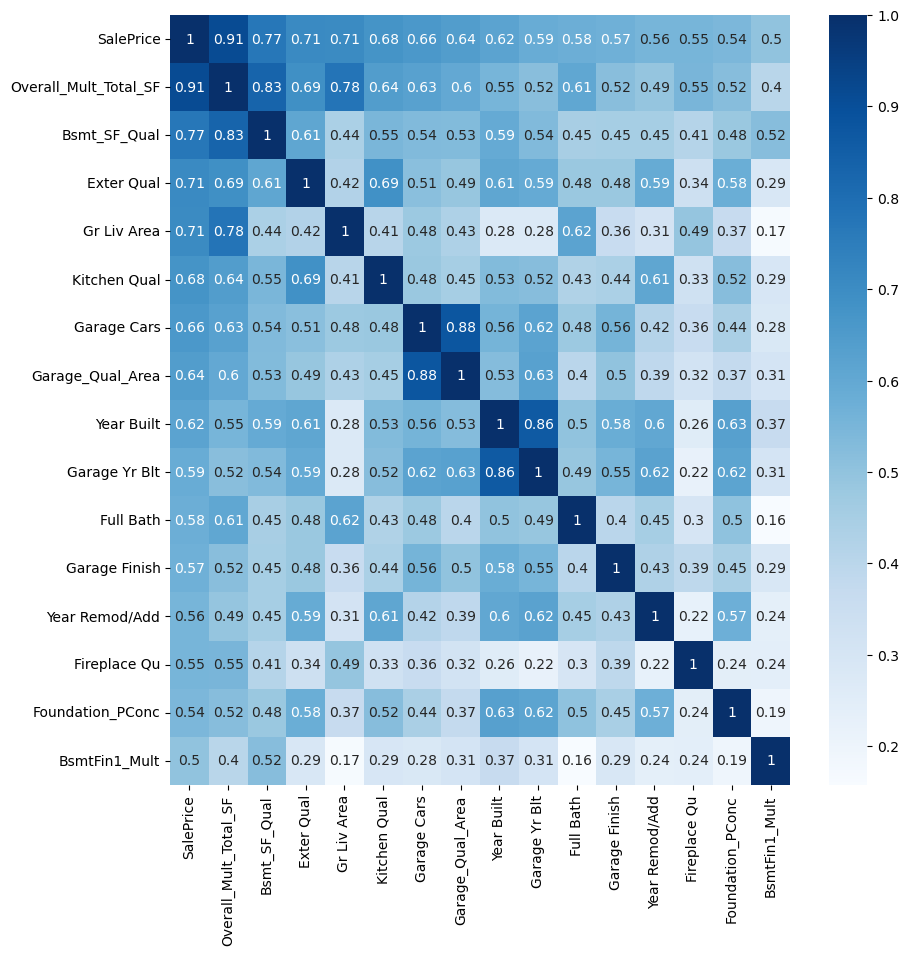

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr.loc[relevant_features.index.values,
                     relevant_features.index.values], annot=True , cmap="Blues")
plt.show()

In [82]:
#Principal component analysis
#source : https://blog.4dcu.be/programming/2021/03/19/Code-Nugget-PCA-with-loadings.html
#source : https://sites.google.com/view/aide-python/statistiques/machine-learning-en-python/analyses-en-composantes-principales

In [83]:
X_tr_intermediate_selection = X_tr[[x for x in X_tr.columns if x in relevant_features.index]]

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#source : https://blog.4dcu.be/programming/2021/03/19/Code-Nugget-PCA-with-loadings.html
pipeline = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=3)),])

pca_data = pd.DataFrame(
    pipeline.fit_transform(X_tr_intermediate_selection),
    columns=["PC1", "PC2", "PC3"],
    index=X_tr_intermediate_selection.index,
)
#pca_data["species"] = iris_df["species"]

pca_step = pipeline.steps[1][1]
loadings = pd.DataFrame(
    pca_step.components_.T,
    columns=["PC1", "PC2", "PC3"],
    index=X_tr_intermediate_selection.columns,
)

In [85]:
print('variance values')
print(pca_step.singular_values_) # Valeurs de variance

print('percent of explained variance')
pca_step.explained_variance_ratio_

variance values
[106.71153375  45.06884768  39.64210517]
percent of explained variance


array([0.51748927, 0.09230634, 0.07141543])

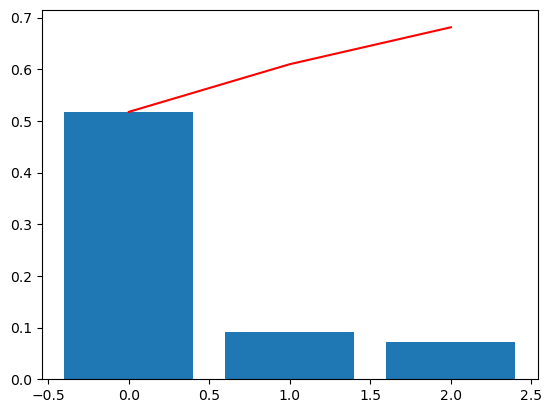

In [86]:
#source : https://sites.google.com/view/aide-python/statistiques/machine-learning-en-python/analyses-en-composantes-principales
explained_var = list(pca_step.explained_variance_ratio_)

x = range(len(explained_var))

explained_var_cum = np.cumsum(explained_var)

plt.bar(x,explained_var)

plt.plot(x,explained_var_cum,"-r")

plt.show()

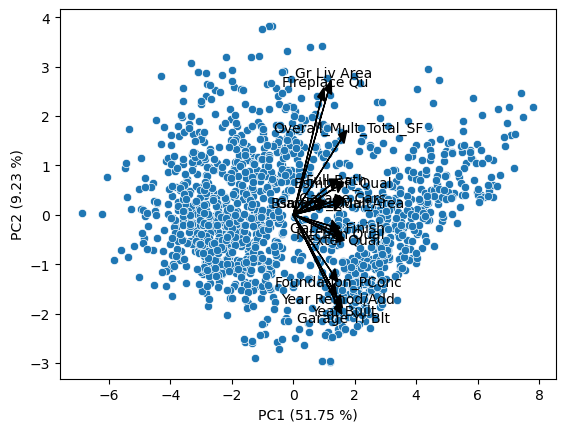

In [87]:
#source : https://blog.4dcu.be/programming/2021/03/19/Code-Nugget-PCA-with-loadings.html
def loading_plot(
    coeff, labels, scale=1, colors=None, visible=None, ax=plt, arrow_size=0.5
):
    for i, label in enumerate(labels):
        if visible is None or visible[i]:
            ax.arrow(
                0,
                0,
                coeff[i, 0] * scale,
                coeff[i, 1] * scale,
                head_width=arrow_size * scale,
                head_length=arrow_size * scale,
                color="#000" if colors is None else colors[i],
            )
            ax.text(
                coeff[i, 0] * 1.15 * scale,
                coeff[i, 1] * 1.15 * scale,
                label,
                color="#000" if colors is None else colors[i],
                ha="center",
                va="center",
            )


g = sns.scatterplot(data=pca_data, x="PC1", y="PC2")

# Add loadings
loading_plot(loadings[["PC1", "PC2"]].values , loadings.index, scale=5, arrow_size=0.05)


# Add variance explained by the
g.set_xlabel(f"PC1 ({pca_step.explained_variance_ratio_[0]*100:.2f} %)")
g.set_ylabel(f"PC2 ({pca_step.explained_variance_ratio_[1]*100:.2f} %)")

plt.show()

The 3 first components of our data set composed of the 15 feature the most correlated to the sale prices describe around 67% of the variance observed in this data set.  

The biplot show that our feature are mostly associated to the second component.

For the simple model we want to keep only 2 features. Keeping the most correlated feature seems to be good as first choice "Overall_Mult_Total_SF". For the second feature I propose to keep one not too associated to the first keep: "Year Built".  

It could have be good to perform an PCA. 

For the simple model we keep 2 features. The first is the most correlated one and the second will not be just the second most corrlated. Because in our case it's Bsmt_SF_Qual a variable highly correlated to the first one. So we go for the variable which have less than 0.6 correlation between the 2. So I propose to keep "overall_Mult_Total_SF" and "Year Built".

The scikit package "feature selection" propose to select best features :

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile

selector_simple = SelectKBest(f_regression, k=2)
#Xnew = selector.fit_transform(X_tr, y_tr)

selector_simple.fit(X_tr, y_tr)
print('Output features Names :', selector_simple.get_feature_names_out()) 

Output features Names : ['Bsmt_SF_Qual' 'Overall_Mult_Total_SF']


C:\Users\s1114237\Anaconda3\envs\adsml\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)


Interesting it pick the feature the most correlated 'Overall_Mult_Total_SF' and an hot-encoded one associated to the age of the house. 

In [89]:
selector_inter = SelectKBest(f_regression, k=15)
#Xnew = selector.fit_transform(X_tr, y_tr)

selector_inter.fit(X_tr, y_tr)
print('Output features Names :', selector_inter.get_feature_names_out()) 

Output features Names : ['BsmtFin1_Mult' 'Bsmt_SF_Qual' 'Exter Qual' 'Fireplace Qu'
 'Foundation_PConc' 'Full Bath' 'Garage Cars' 'Garage Finish'
 'Garage Yr Blt' 'Garage_Qual_Area' 'Gr Liv Area' 'Kitchen Qual'
 'Overall_Mult_Total_SF' 'Year Built' 'Year Remod/Add']


C:\Users\s1114237\Anaconda3\envs\adsml\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)


It's the exact same 15 features select based only on correlation

### Models :
Which type of model we will use. In our study we want to compare models with different set of predictors a simple one with only 2 predictors an intermediate one with more and a model using au the predictors. As we have many predictors a regularization step is needed to handle mullticollinearity. Two approach is possible Ridge Regression with a L2 regularization or Lasso with a L1 regularization. With a Lasso model we will select a reduce numbers of variables which is good for having a more sparse model but as in our case we want to compare models with differents numbers of variables a Ridge regression with seems more appropriate.


#### The simple model
With only 2 features

In [90]:
simple_skfeatures = selector_simple.get_feature_names_out()
simple_corr = ['Overall_Mult_Total_SF','Year Built']

In [120]:
from sklearn.linear_model import LinearRegression

def lr_model(X, cols, y, X_val):
    lr = LinearRegression()
    lr.fit(X[cols], y)

    # Compute predictions
    y_val_lr =lr.predict(X_val[cols])
    
    return y_val_lr, lr

Text(40168.7605085384, 507933, ' RMSE : 27934.01 ')

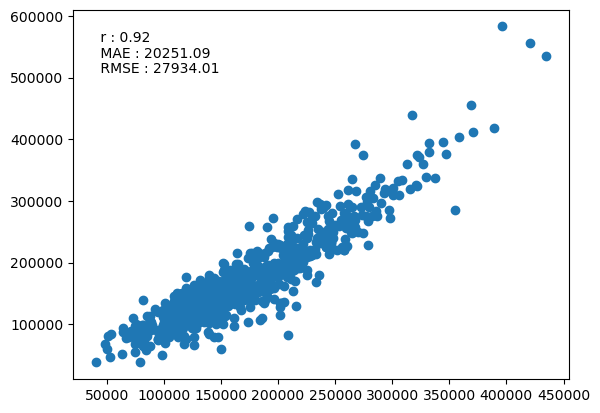

In [121]:
# Plot the model
y_val_simple_skfeatures, lr_simple_skfeatures = lr_model(X_tr, simple_skfeatures, y_tr, X_val )
r = np.corrcoef(y_val_simple_skfeatures,  y_val)
mae_simple_skfeatures = MAE(y_val_simple_skfeatures,  y_val)
rmse_simple_skfeatures = RMSE(y_val_simple_skfeatures,  y_val)

plt.scatter(y_val_simple_skfeatures, y_val) #pred vs obs
plt.text(y_val_simple_skfeatures.min(),y_val.max()-25000,f' r : {round(r[0,1],3)} ')
plt.text(y_val_simple_skfeatures.min(),y_val.max()-50000,f' MAE : {round(mae_simple_skfeatures,2)} ')
plt.text(y_val_simple_skfeatures.min(),y_val.max()-75000,f' RMSE : {round(rmse_simple_skfeatures,2)} ')

Text(43660.846081022115, 507933, ' RMSE : 27283.85 ')

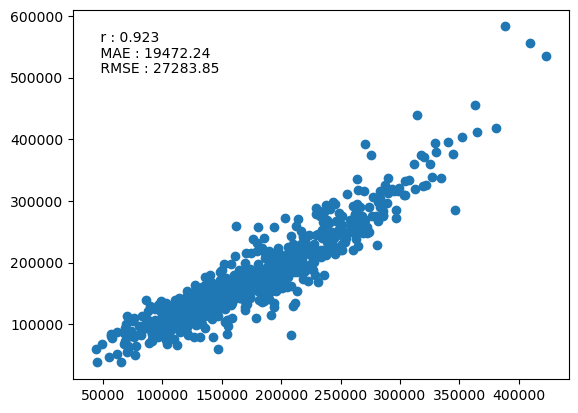

In [122]:
# Plot the model
y_val_simple_corr, lr_simple_corr = lr_model(X_tr, simple_corr, y_tr, X_val )
r = np.corrcoef(y_val_simple_corr,  y_val)
mae_simple_corr = MAE(y_val_simple_corr,  y_val)
rmse_simple_corr = RMSE(y_val_simple_corr,  y_val)

plt.scatter(y_val_simple_corr, y_val) #pred vs obs
plt.text(y_val_simple_corr.min(),y_val.max()-25000,f' r : {round(r[0,1],3)} ')
plt.text(y_val_simple_corr.min(),y_val.max()-50000,f' MAE : {round(mae_simple_corr,2)} ')
plt.text(y_val_simple_corr.min(),y_val.max()-75000,f' RMSE : {round(rmse_simple_corr,2)} ')

#### The intermediate model
With 15 features

In [123]:
intermediate_skfeatures = selector_inter.get_feature_names_out()

Text(18545.08734947478, 507933, ' RMSE : 24752.64 ')

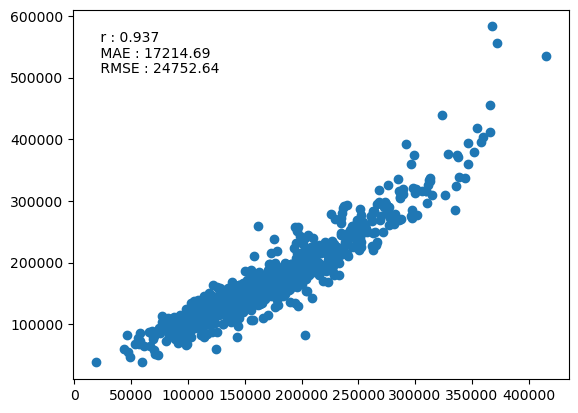

In [124]:
# Plot the model
y_val_intermediate_skfeatures, lr_intermediate_skfeatures = lr_model(X_tr, intermediate_skfeatures, y_tr, X_val )
r = np.corrcoef(y_val_intermediate_skfeatures,  y_val)
mae_intermediate_skfeatures = MAE(y_val_intermediate_skfeatures,  y_val)
rmse_intermediate_skfeatures = RMSE(y_val_intermediate_skfeatures,  y_val)

plt.scatter(y_val_intermediate_skfeatures, y_val) #pred vs obs
plt.text(y_val_intermediate_skfeatures.min(),y_val.max()-25000,f' r : {round(r[0,1],3)} ')
plt.text(y_val_intermediate_skfeatures.min(),y_val.max()-50000,f' MAE : {round(mae_intermediate_skfeatures,2)} ')
plt.text(y_val_intermediate_skfeatures.min(),y_val.max()-75000,f' RMSE : {round(rmse_intermediate_skfeatures,2)} ')

#### The complex model 

The regularization is used to help to calibrate models and avoid overfitting. In our case to do that we will apply a penalised term on our features. The strenght of this regularisation is determined with a alpha term. Closer to 0 lesser the penalisation is, higher this term is stronger the penalisation is.

In [96]:
from sklearn.linear_model import Ridge

# Variable to store the results
gs_results = []

# Grid search 
for alpha in np.logspace(-4, 8, num=50): # for alpha between  a=1e-4 and b = 1e4 SO -4,4
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr, y_tr)
    
    # Save model and its performance on train/validation sets
    gs_results.append(
        {
            "alpha": alpha,
            "train_rmse": RMSE(y_tr, ridge.predict(X_tr)), 
            "train_mae" : MAE(y_tr, ridge.predict(X_tr)),
            "validation_rmse" : RMSE(y_val, ridge.predict(X_val)),
            "validation_mae" : MAE(y_val, ridge.predict(X_val)),
        }
    )
            

In [97]:
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

alpha    train_rmse     train_mae  validation_rmse  validation_mae
0  0.000100  15914.065300  11294.274799     22518.085913    14712.445256
1  0.000176  15914.065300  11294.276256     22517.474008    14712.373299
2  0.000309  15914.065301  11294.278816     22516.399756    14712.246926
3  0.000543  15914.065303  11294.283308     22514.515380    14712.025110
4  0.000954  15914.065308  11294.291182     22511.214752    14711.636149

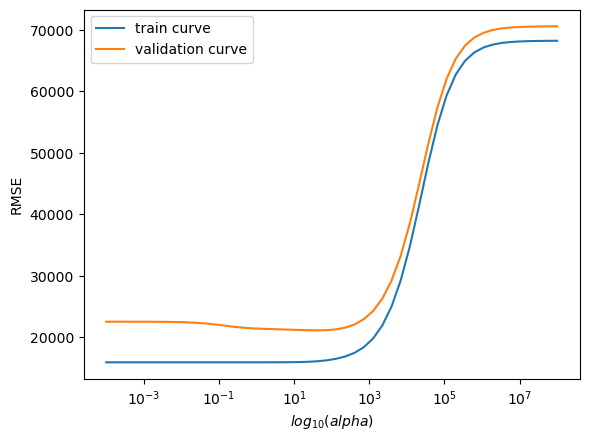

In [98]:
# Plot the validation curves
plt.semilogx(gs_results["alpha"], gs_results["train_rmse"], label="train curve")
plt.semilogx(gs_results["alpha"], gs_results["validation_rmse"], label="validation curve")
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("RMSE")
plt.legend()
plt.show()

We detect over fitting with log10(alpha) < 10^-1 it tend to decrease untill the penalisation become too strong log10(alpha) = 10^3. The best alpha threshold minimise the rmse on the validation curve.

In [99]:
alpha = gs_results[gs_results['validation_rmse'] == gs_results['validation_rmse'].min()]['alpha']

In [125]:
#Ridge regression #simple with regularisation
from sklearn.linear_model import Ridge

def Rr_model(X, y, X_val, alpha):
    Rr = Ridge(alpha= alpha)
    Rr.fit(X, y)

    # Compute predictions
    y_val_Rr =Rr.predict(X_val)
    
    return y_val_Rr, Rr

Text(46520.15041726656, 507933, ' RMSE : 21109.91 ')

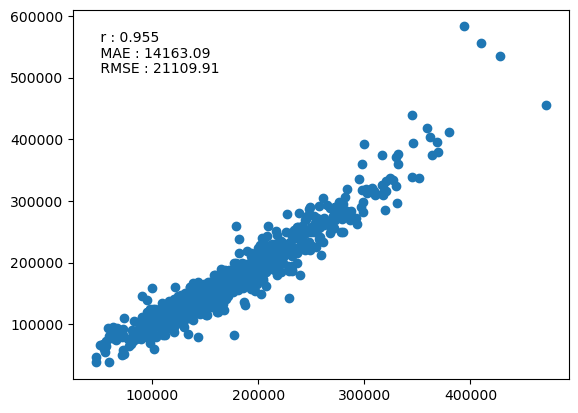

In [126]:
#l_alpha=1
y_val_ridge, Rr_complete = Rr_model(X_tr, y_tr, X_val, alpha)

r = np.corrcoef(y_val_ridge,  y_val)
mae_complete = MAE(y_val_ridge,  y_val)
rmse_complete = RMSE(y_val_ridge,  y_val)

plt.scatter(y_val_ridge, y_val) #pred vs obs
plt.text(y_val_ridge.min(),y_val.max()-25000,f' r : {round(r[0,1],3)} ')
plt.text(y_val_ridge.min(),y_val.max()-50000,f' MAE : {round(mae_complete,2)} ')
plt.text(y_val_ridge.min(),y_val.max()-75000,f' RMSE : {round(rmse_complete,2)} ')

#### Models comparison

We have two metrics to compare our models the mae and the rmse.

In [102]:
mae_heights = [mae_simple_corr, mae_intermediate_skfeatures, mae_complete]
rmse_heights = [rmse_simple_corr, rmse_intermediate_skfeatures, rmse_complete]
names = ['Simple', ' Intermediate', 'Complete']


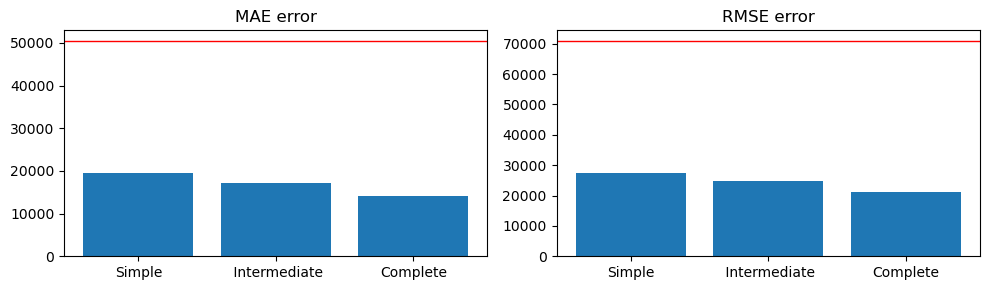

In [103]:
y_pos = np.arange(len(names))

fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

#MAE
axes[0].bar(y_pos,mae_heights)
axes[0].set_xticks(y_pos)
axes[0].set_xticklabels(names)
axes[0].axhline(y=mae_baseline,linewidth=1, color='red')
axes[0].set_title("MAE error")
    
#RMSE
axes[1].bar(y_pos,rmse_heights)
axes[1].set_xticks(y_pos)
axes[1].set_xticklabels(names)
axes[1].axhline(y=rmse_baseline,linewidth=1, color='red')
axes[1].set_title("RMSE error")

# Adjusting spacing between plots
plt.tight_layout()
plt.show()

## Predicting on test data

First we have to prepare test data and transform them the same way that we transform the initial data set. To do that I create for each step a function to summary the transformation applied.

In [167]:
def missing_values(df_input, cat_col) :
    df = df_input.copy()
    df.drop(['Order'], axis =1, inplace=True) # I need to keep: 'PID'
    
    #I transform the numerical type of cat col
    df['MS SubClass'] = df['MS SubClass'].apply(str)
    df['Overall Qual'] = df['Overall Qual'].apply(str)
    df['Overall Cond'] = df['Overall Cond'].apply(str)
    
    ## Categorical features 
    ## We remove empty entries that shouldn't be null
    #df.dropna(subset=['Mas Vnr Type', 'Electrical'], inplace=True) #we can't remove any entry
    
    ## We attribute a value for the others first cat
    df[cat_col] = df[cat_col].fillna('NA')
    
    df.drop(['Misc Feature'], axis =1, inplace=True) # There is no more this feature
    
    ## Numerical features
    ## For garage year built
    df.loc[df['Garage Yr Blt'].isna(),'Garage Yr Blt']  = df.loc[df['Garage Yr Blt'].isna(),'Year Built'] 
    ## For Lot Frontage
    df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())
    
    df= df.fillna(0) # Lot of surface, if the value is missing it's certainly due to the fact that this features is missing
    #df.dropna(inplace = True)
    
    return df

In [168]:
def outliers_filter(df, cont_col):
    
    filter_df = df[cont_col].copy()
    
    for i in range(len(cont_col)):
        std3 = df.loc[df[cont_col[i]] > 0, cont_col[i]].mean() + (np.std(df.loc[df[cont_col[i]] > 0, cont_col[i]])* 3)
        filter_df[cont_col[i]] = (df[cont_col[i]] < std3)
        
    filter = filter_df.select_dtypes(include='bool').sum(axis=1) == len(cont_col)

    return filter

In [169]:
def ordinal_to_discrete(df):
    df['Overall Qual'] = df['Overall Qual'].map(int)
    df['Overall Cond'] = df['Overall Cond'].apply(int)
    
    # map dictionnaries
    lot_shape_mapping= {'IR3' : 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
    utilities_mapping= {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}
    land_slope_mapping = {'Gtl': 0, 'Mod': 0.5, 'Sev': 1}
    exter_qual_cond_mapping = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    bsmt_qual_cond_mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    bsmt_exposure_mapping = {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
    bsmt_fin_type_mapping = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
    heating_qc_mapping = exter_qual_cond_mapping  # same mapping as Exter Qual/Cond
    kitchen_qual_mapping = exter_qual_cond_mapping  # same mapping as Exter Qual/Cond
    functional_mapping = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
    garage_finish_mapping = {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
    garage_qual_mapping = bsmt_qual_cond_mapping  # same mapping as Bsmt Qual/Cond
    garage_cond_mapping = bsmt_qual_cond_mapping  # same mapping as Bsmt Qual/Cond
    fireplace_qu_mapping = bsmt_qual_cond_mapping  # same mapping as Bsmt Qual/Cond
    paved_drive_mapping = {'N': 0, 'P': 1, 'Y': 2}
    pool_qc_mapping = {'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
    fence_mapping = {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
    Electrical_mapping = {'Mix' : 1, 'FuseP' : 2, 'FuseF' : 3, 'FuseA': 4, 'SBrkr' : 5}

    # map application
    df['Lot Shape'] = df['Lot Shape'].replace(lot_shape_mapping)
    df['Utilities'] = df['Utilities'].replace(utilities_mapping)
    df['Land Slope'] = df['Land Slope'].replace(land_slope_mapping)
    df['Exter Qual'] = df['Exter Qual'].replace(exter_qual_cond_mapping)
    df['Exter Cond'] = df['Exter Cond'].replace(exter_qual_cond_mapping)
    df['Bsmt Qual'] = df['Bsmt Qual'].replace(bsmt_qual_cond_mapping)
    df['Bsmt Cond'] = df['Bsmt Cond'].replace(bsmt_qual_cond_mapping)
    df['Bsmt Exposure'] = df['Bsmt Exposure'].replace(bsmt_exposure_mapping)
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].replace(bsmt_fin_type_mapping)
    df['BsmtFin Type 2'] = df['BsmtFin Type 2'].replace(bsmt_fin_type_mapping)
    df['Heating QC'] = df['Heating QC'].replace(heating_qc_mapping)
    df['Kitchen Qual'] = df['Kitchen Qual'].replace(kitchen_qual_mapping)
    df['Functional'] = df['Functional'].replace(functional_mapping)
    df['Garage Finish'] = df['Garage Finish'].replace(garage_finish_mapping)
    df['Garage Qual'] = df['Garage Qual'].replace(garage_qual_mapping)
    df['Garage Cond'] = df['Garage Cond'].replace(garage_cond_mapping)
    df['Fireplace Qu'] = df['Fireplace Qu'].replace(fireplace_qu_mapping)
    df['Paved Drive'] = df['Paved Drive'].replace(paved_drive_mapping)
    df['Pool QC'] = df['Pool QC'].replace(pool_qc_mapping)
    df['Fence'] = df['Fence'].replace(fence_mapping)
    df['Electrical'] = df['Electrical'].replace(Electrical_mapping )

    return df

In [170]:
def preprocess(df, cat_col, cont_col, scaler):
    
    # Work on a copy 
    df_1 = df.copy()
    
    # Duplicated entries
    df_2 = df_1.drop_duplicates()
    
    # Missing values
    df_3 = missing_values(df_2, cat_col)
    
    # Outliers #To keep ?
    #filter = outliers_filter(df_3, cont_col)
    #df_4 = df_3[filter]
    
    # Ordinal to discrete
    df_5 = ordinal_to_discrete(df_3)
    
    # One-hot encoding
    df_6 = pd.get_dummies(df_5)
    
    #New features
    df_7 = create_new_feature(df_6)
    old_features =['Total Bsmt SF', '2nd Flr SF', '1st Flr SF', 'Overall Qual', 'Garage Area', 
               'Garage Qual', 'BsmtFin Type 1','BsmtFin SF 1','Total Bsmt SF', 'Bsmt Qual']
    df_7 = df_7.drop(old_features, axis=1)
      
    return df_7

In [171]:
# Download 
test_df = pd.read_csv("house-prices-test.csv")
test_df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0   2217  909279080           50        RL           NaN     11275   Pave   
1    837  907126050           20        RL          65.0      9757   Pave   
2   2397  528144030           60        RL          86.0     11065   Pave   
3   1963  535452060           20        RL          70.0      7000   Pave   
4    306  911202100           50   C (all)          66.0      8712   Pave   

  Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0   NaN       IR1          HLS  ...            0         0     NaN   NaN   
1   NaN       Reg          Low  ...           92         0     NaN   NaN   
2   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
3   NaN       Reg          Lvl  ...            0         0     NaN  MnWw   
4  Pave       Reg          HLS  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  
0          NaN        0       3    2007        WD           Normal  
1          NaN        0      10    2009        WD           Normal  
2          NaN        0      10    2006        New         Partial  
3          NaN        0       4    2007        WD           Family  
4          NaN        0       1    2010        WD          Abnorml  

[5 rows x 81 columns]

In [172]:
cat_col = ['MS SubClass','MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 
           'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
           'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Roof Matl', 
           'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',  'Foundation', 
           'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 
           'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 
           'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 
           'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

In [173]:
cont_col =['Lot Frontage', #Lot Frontage (Continuous): Linear feet of street connected to property
           'Lot Area', #Lot Area (Continuous): Lot size in square feet
           'Mas Vnr Area', # Mas Vnr Area (Continuous): Masonry veneer area in square feet
           'BsmtFin SF 1', # BsmtFin SF 1 (Continuous): Type 1 finished square feet
           'BsmtFin SF 2', # BsmtFin SF 2 (Continuous): Type 2 finished square feet
           'Bsmt Unf SF', # Bsmt Unf SF (Continuous): Unfinished square feet of basement area
           'Total Bsmt SF', # Total Bsmt SF (Continuous): Total square feet of basement area
           '1st Flr SF', # 1st Flr SF (Continuous): First Floor square feet 
           '2nd Flr SF', # 2nd Flr SF (Continuous)	: Second floor square feet
           'Low Qual Fin SF', # Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)
           'Gr Liv Area', # Gr Liv Area (Continuous): Above grade (ground) living area square feet
           'Garage Area', # Garage Area (Continuous): Size of garage in square feet         
           'Wood Deck SF', # Wood Deck SF (Continuous): Wood deck area in square feet
           'Open Porch SF', # Open Porch SF (Continuous): Open porch area in square feet
           'Enclosed Porch', # Enclosed Porch (Continuous): Enclosed porch area in square feet
           '3Ssn Porch', # 3-Ssn Porch (Continuous): Three season porch area in square feet
           'Screen Porch', # Screen Porch (Continuous): Screen porch area in square feet
           'Pool Area', # Pool Area (Continuous): Pool area in square feet  
           'Misc Val' # Misc Val (Continuous): $Value of miscellaneous feature
          ]

In [174]:
test_df = preprocess(test_df , cat_col, cont_col, scaler)

In [175]:
test_df.shape

(500, 208)

In [176]:
missing_columns = []
for element in X.columns.values:
    if element not in test_df.columns.values:
        missing_columns.append(element)
 
print(missing_columns)

['Condition 2_Artery', 'Condition 2_PosA', 'Condition 2_RRAe', 'Condition 2_RRAn', 'Condition 2_RRNn', 'Exterior 1st_AsphShn', 'Exterior 1st_BrkComm', 'Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_PreCast', 'Exterior 1st_Stone', 'Exterior 2nd_AsphShn', 'Exterior 2nd_PreCast', 'Foundation_Wood', 'Heating_Floor', 'MS SubClass_150', 'MS Zoning_A (agr)', 'MS Zoning_I (all)', 'Mas Vnr Type_CBlock', 'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'Roof Matl_Metal', 'Roof Matl_WdShngl', 'Roof Style_Shed', 'Sale Type_Con', 'Sale Type_VWD']


In [177]:
test_df[missing_columns] = 0

In [178]:
excess_columns = []
for element in test_df.columns.values:
    if element not in X.columns.values :
        excess_columns.append(element)
 
print(excess_columns)

['PID', 'Roof Matl_Roll', 'Exterior 2nd_Other', 'Mas Vnr Type_NA']


I need to keep 'PID'

In [179]:
test_df_PID = test_df[['PID', 'Overall_Mult_Total_SF']]

In [180]:
test_df = test_df.loc[:, ~test_df.columns.isin(excess_columns)]

In [181]:
test_df = test_df.sort_index(axis=1)

### Standardisation

In [182]:
df_rescaled = scaler.transform(test_df.loc[:, ~test_df.columns.isin(['Roof Matl_Roll', 'Exterior 2nd_Other'])])
df_rescaled = pd.DataFrame(df_rescaled, columns = test_df.columns)

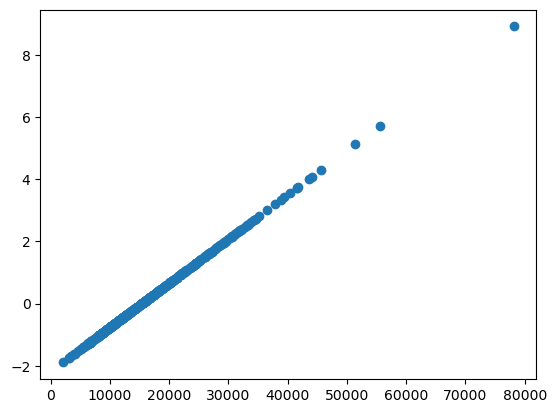

In [183]:
plt.scatter(test_df['Overall_Mult_Total_SF'],df_rescaled['Overall_Mult_Total_SF'])

### Models

In [184]:
simple_corr = ['Overall_Mult_Total_SF','Year Built']
y_simple = lr_simple_corr.predict(df_rescaled[simple_corr])

In [185]:
df_y_simple = pd.DataFrame(
    {
        "PID": test_df_PID['PID'],
        "SalePrice": y_simple
    }
    
)
df_y_simple.head() 

PID      SalePrice
0  909279080  171280.652200
1  907126050  138219.063945
2  528144030  257372.901302
3  535452060  131819.306389
4  911202100   88844.772590

In [186]:
df_y_simple.to_csv('predictions-simple-model.csv', index=False)

In [187]:
intermediate_skfeatures = selector_inter.get_feature_names_out()
y_intermediate = lr_intermediate_skfeatures.predict(df_rescaled[intermediate_skfeatures])

In [188]:
df_y_intermediate = pd.DataFrame(
    {
        "PID": test_df_PID['PID'],
        "SalePrice":y_intermediate
    }
    
)
df_y_intermediate.head() 

PID      SalePrice
0  909279080  172035.850237
1  907126050  140090.560598
2  528144030  262139.827238
3  535452060  129038.190525
4  911202100   91899.475495

In [189]:
df_y_intermediate.to_csv('predictions-intermediate-model.csv', index=False)

In [190]:
y_complete = Rr_complete.predict(df_rescaled)

In [191]:
df_y_complete = pd.DataFrame(
    {
        "PID": test_df_PID['PID'],
        "SalePrice":y_complete
    }
    
)
df_y_complete.head() 

PID      SalePrice
0  909279080  213913.110773
1  907126050  147622.584097
2  528144030  301768.532503
3  535452060  123777.764774
4  911202100  102697.066352

In [192]:
df_y_complete.to_csv('predictions-complex-model.csv', index=False)

After passing the csv file :
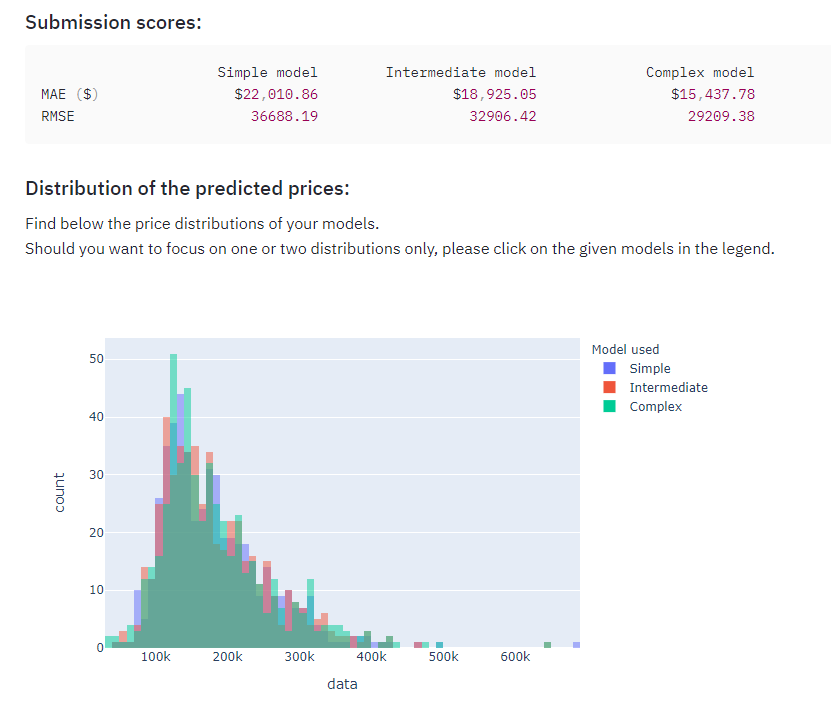